# Loading data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.svm import SVR, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('/kaggle/input/master-thesis/data.csv', sep=';')

In [3]:
df.head()

Melt temperature  Mold temperature  time_to_fill  ZDx - Plasticizing time  \
0        106.476184            80.617         7.124                     3.16   
1        105.505000            81.362         6.968                     3.16   
2        105.505000            80.411         6.864                     4.08   
3        106.474827            81.162         6.864                     3.16   
4        106.466140            81.471         6.864                     3.22   

   ZUx - Cycle time  SKx - Closing force  SKs - Clamping force peak value  \
0             74.83           886.900000                       904.000000   
1             74.81           919.409791                       935.900000   
2             74.81           908.600000                       902.344823   
3             74.82           879.410871                       902.033653   
4             74.83           885.644260                       902.821269   

   Ms - Torque peak value current cycle  Mm - Torque mean value current cycle  \
0                                 116.9                            104.300000   
1                                 113.9                            104.900000   
2                                 120.5                            106.503496   
3                                 127.3                            104.900000   
4                                 120.5                            106.700000   

   APSs - Specific back pressure peak value  \
0                                     145.6   
1                                     145.6   
2                                     147.0   
3                                     145.6   
4                                     145.6   

   APVs - Specific injection pressure peak value  \
0                                          922.3   
1                                          930.5   
2                                          933.1   
3                                          922.3   
4                                          917.5   

   CPn - Screw position at the end of hold pressure  SVo - Shot volume  \
0                                              8.82              18.73   
1                                              8.59              18.73   
2                                              8.80              18.98   
3                                              8.85              18.73   
4                                              8.80              18.75   

   quality  
0      1.0  
1      1.0  
2      1.0  
3      1.0  
4      1.0

In [4]:
df.columns

Index(['Melt temperature', 'Mold temperature', 'time_to_fill',
       'ZDx - Plasticizing time', 'ZUx - Cycle time', 'SKx - Closing force',
       'SKs - Clamping force peak value',
       'Ms - Torque peak value current cycle',
       'Mm - Torque mean value current cycle',
       'APSs - Specific back pressure peak value',
       'APVs - Specific injection pressure peak value',
       'CPn - Screw position at the end of hold pressure', 'SVo - Shot volume',
       'quality'],
      dtype='object')

### Lets check simple statistics

In [5]:
df.describe()

Melt temperature  Mold temperature  time_to_fill  \
count       1451.000000       1451.000000   1451.000000   
mean         106.892040         81.326023      7.459043   
std            5.615773          0.428813      1.688106   
min           81.747000         78.409000      6.084000   
25%          105.914500         81.123500      6.292000   
50%          106.089000         81.327000      6.968000   
75%          106.263000         81.441000      7.124000   
max          155.032000         82.159000     11.232000   

       ZDx - Plasticizing time  ZUx - Cycle time  SKx - Closing force  \
count              1451.000000       1451.000000          1451.000000   
mean                  3.234173         75.218794           901.974834   
std                   0.343230          0.432761            11.098192   
min                   2.780000         74.780000           876.700000   
25%                   3.000000         74.820000           893.600000   
50%                   3.192600         74.830000           902.400000   
75%                   3.290000         75.650000           909.400000   
max                   6.610000         75.790000           930.600000   

       SKs - Clamping force peak value  Ms - Torque peak value current cycle  \
count                      1451.000000                           1451.000000   
mean                        919.351778                            116.716747   
std                          10.780023                              5.029085   
min                         894.800000                             94.200000   
25%                         914.400000                            114.200000   
50%                         918.800000                            116.900000   
75%                         926.300000                            120.200000   
max                         946.500000                            130.300000   

       Mm - Torque mean value current cycle  \
count                           1451.000000   
mean                             104.163904   
std                                4.802195   
min                               76.500000   
25%                              103.550000   
50%                              105.200000   
75%                              106.531415   
max                              114.900000   

       APSs - Specific back pressure peak value  \
count                               1451.000000   
mean                                 146.230048   
std                                    0.804894   
min                                  144.800000   
25%                                  145.600000   
50%                                  146.100000   
75%                                  146.700000   
max                                  150.500000   

       APVs - Specific injection pressure peak value  \
count                                    1451.000000   
mean                                      900.972846   
std                                        25.519215   
min                                       780.500000   
25%                                       886.650000   
50%                                       906.800000   
75%                                       918.900000   
max                                       943.000000   

       CPn - Screw position at the end of hold pressure  SVo - Shot volume  \
count                                       1451.000000        1451.000000   
mean                                           8.808863          18.756285   
std                                            0.097238           0.095528   
min                                            8.330000          18.510000   
25%                                            8.770000          18.710000   
50%                                            8.820000          18.750000   
75%                                            8.850000          18.790000   
max                                            9.060000          19.230000   

    

# Clearing the data

## First of all lets check our data for null values

In [6]:
df1 = df.dropna()

In [7]:
df1.describe()

Melt temperature  Mold temperature  time_to_fill  \
count       1451.000000       1451.000000   1451.000000   
mean         106.892040         81.326023      7.459043   
std            5.615773          0.428813      1.688106   
min           81.747000         78.409000      6.084000   
25%          105.914500         81.123500      6.292000   
50%          106.089000         81.327000      6.968000   
75%          106.263000         81.441000      7.124000   
max          155.032000         82.159000     11.232000   

       ZDx - Plasticizing time  ZUx - Cycle time  SKx - Closing force  \
count              1451.000000       1451.000000          1451.000000   
mean                  3.234173         75.218794           901.974834   
std                   0.343230          0.432761            11.098192   
min                   2.780000         74.780000           876.700000   
25%                   3.000000         74.820000           893.600000   
50%                   3.192600         74.830000           902.400000   
75%                   3.290000         75.650000           909.400000   
max                   6.610000         75.790000           930.600000   

       SKs - Clamping force peak value  Ms - Torque peak value current cycle  \
count                      1451.000000                           1451.000000   
mean                        919.351778                            116.716747   
std                          10.780023                              5.029085   
min                         894.800000                             94.200000   
25%                         914.400000                            114.200000   
50%                         918.800000                            116.900000   
75%                         926.300000                            120.200000   
max                         946.500000                            130.300000   

       Mm - Torque mean value current cycle  \
count                           1451.000000   
mean                             104.163904   
std                                4.802195   
min                               76.500000   
25%                              103.550000   
50%                              105.200000   
75%                              106.531415   
max                              114.900000   

       APSs - Specific back pressure peak value  \
count                               1451.000000   
mean                                 146.230048   
std                                    0.804894   
min                                  144.800000   
25%                                  145.600000   
50%                                  146.100000   
75%                                  146.700000   
max                                  150.500000   

       APVs - Specific injection pressure peak value  \
count                                    1451.000000   
mean                                      900.972846   
std                                        25.519215   
min                                       780.500000   
25%                                       886.650000   
50%                                       906.800000   
75%                                       918.900000   
max                                       943.000000   

       CPn - Screw position at the end of hold pressure  SVo - Shot volume  \
count                                       1451.000000        1451.000000   
mean                                           8.808863          18.756285   
std                                            0.097238           0.095528   
min                                            8.330000          18.510000   
25%                                            8.770000          18.710000   
50%                                            8.820000          18.750000   
75%                                            8.850000          18.790000   
max                                            9.060000          19.230000   

    

#### after deleting null values rows, we have same amount of rows, which means our data is clear for nulls

## Lets remove duplicates from our data

In [8]:
df1 = df1.drop_duplicates()

In [9]:
df1.count()

Melt temperature                                    1451
Mold temperature                                    1451
time_to_fill                                        1451
ZDx - Plasticizing time                             1451
ZUx - Cycle time                                    1451
SKx - Closing force                                 1451
SKs - Clamping force peak value                     1451
Ms - Torque peak value current cycle                1451
Mm - Torque mean value current cycle                1451
APSs - Specific back pressure peak value            1451
APVs - Specific injection pressure peak value       1451
CPn - Screw position at the end of hold pressure    1451
SVo - Shot volume                                   1451
quality                                             1451
dtype: int64

#### How we can see there were no duplicates!

# Trajectories 
Lets create scatter plots to see how our data is distributed

In [10]:
# for i in df1.columns.array:
#     fig = plt.figure()
#     plt.title(i)
#     plt.scatter(x = df1[i], y = df1['quality'])
#     #fig.savefig("Trajectory:_" + i + '_to_' + 'quality')
#     plt.show()

#### We also can use seaborn to build all the trajectories

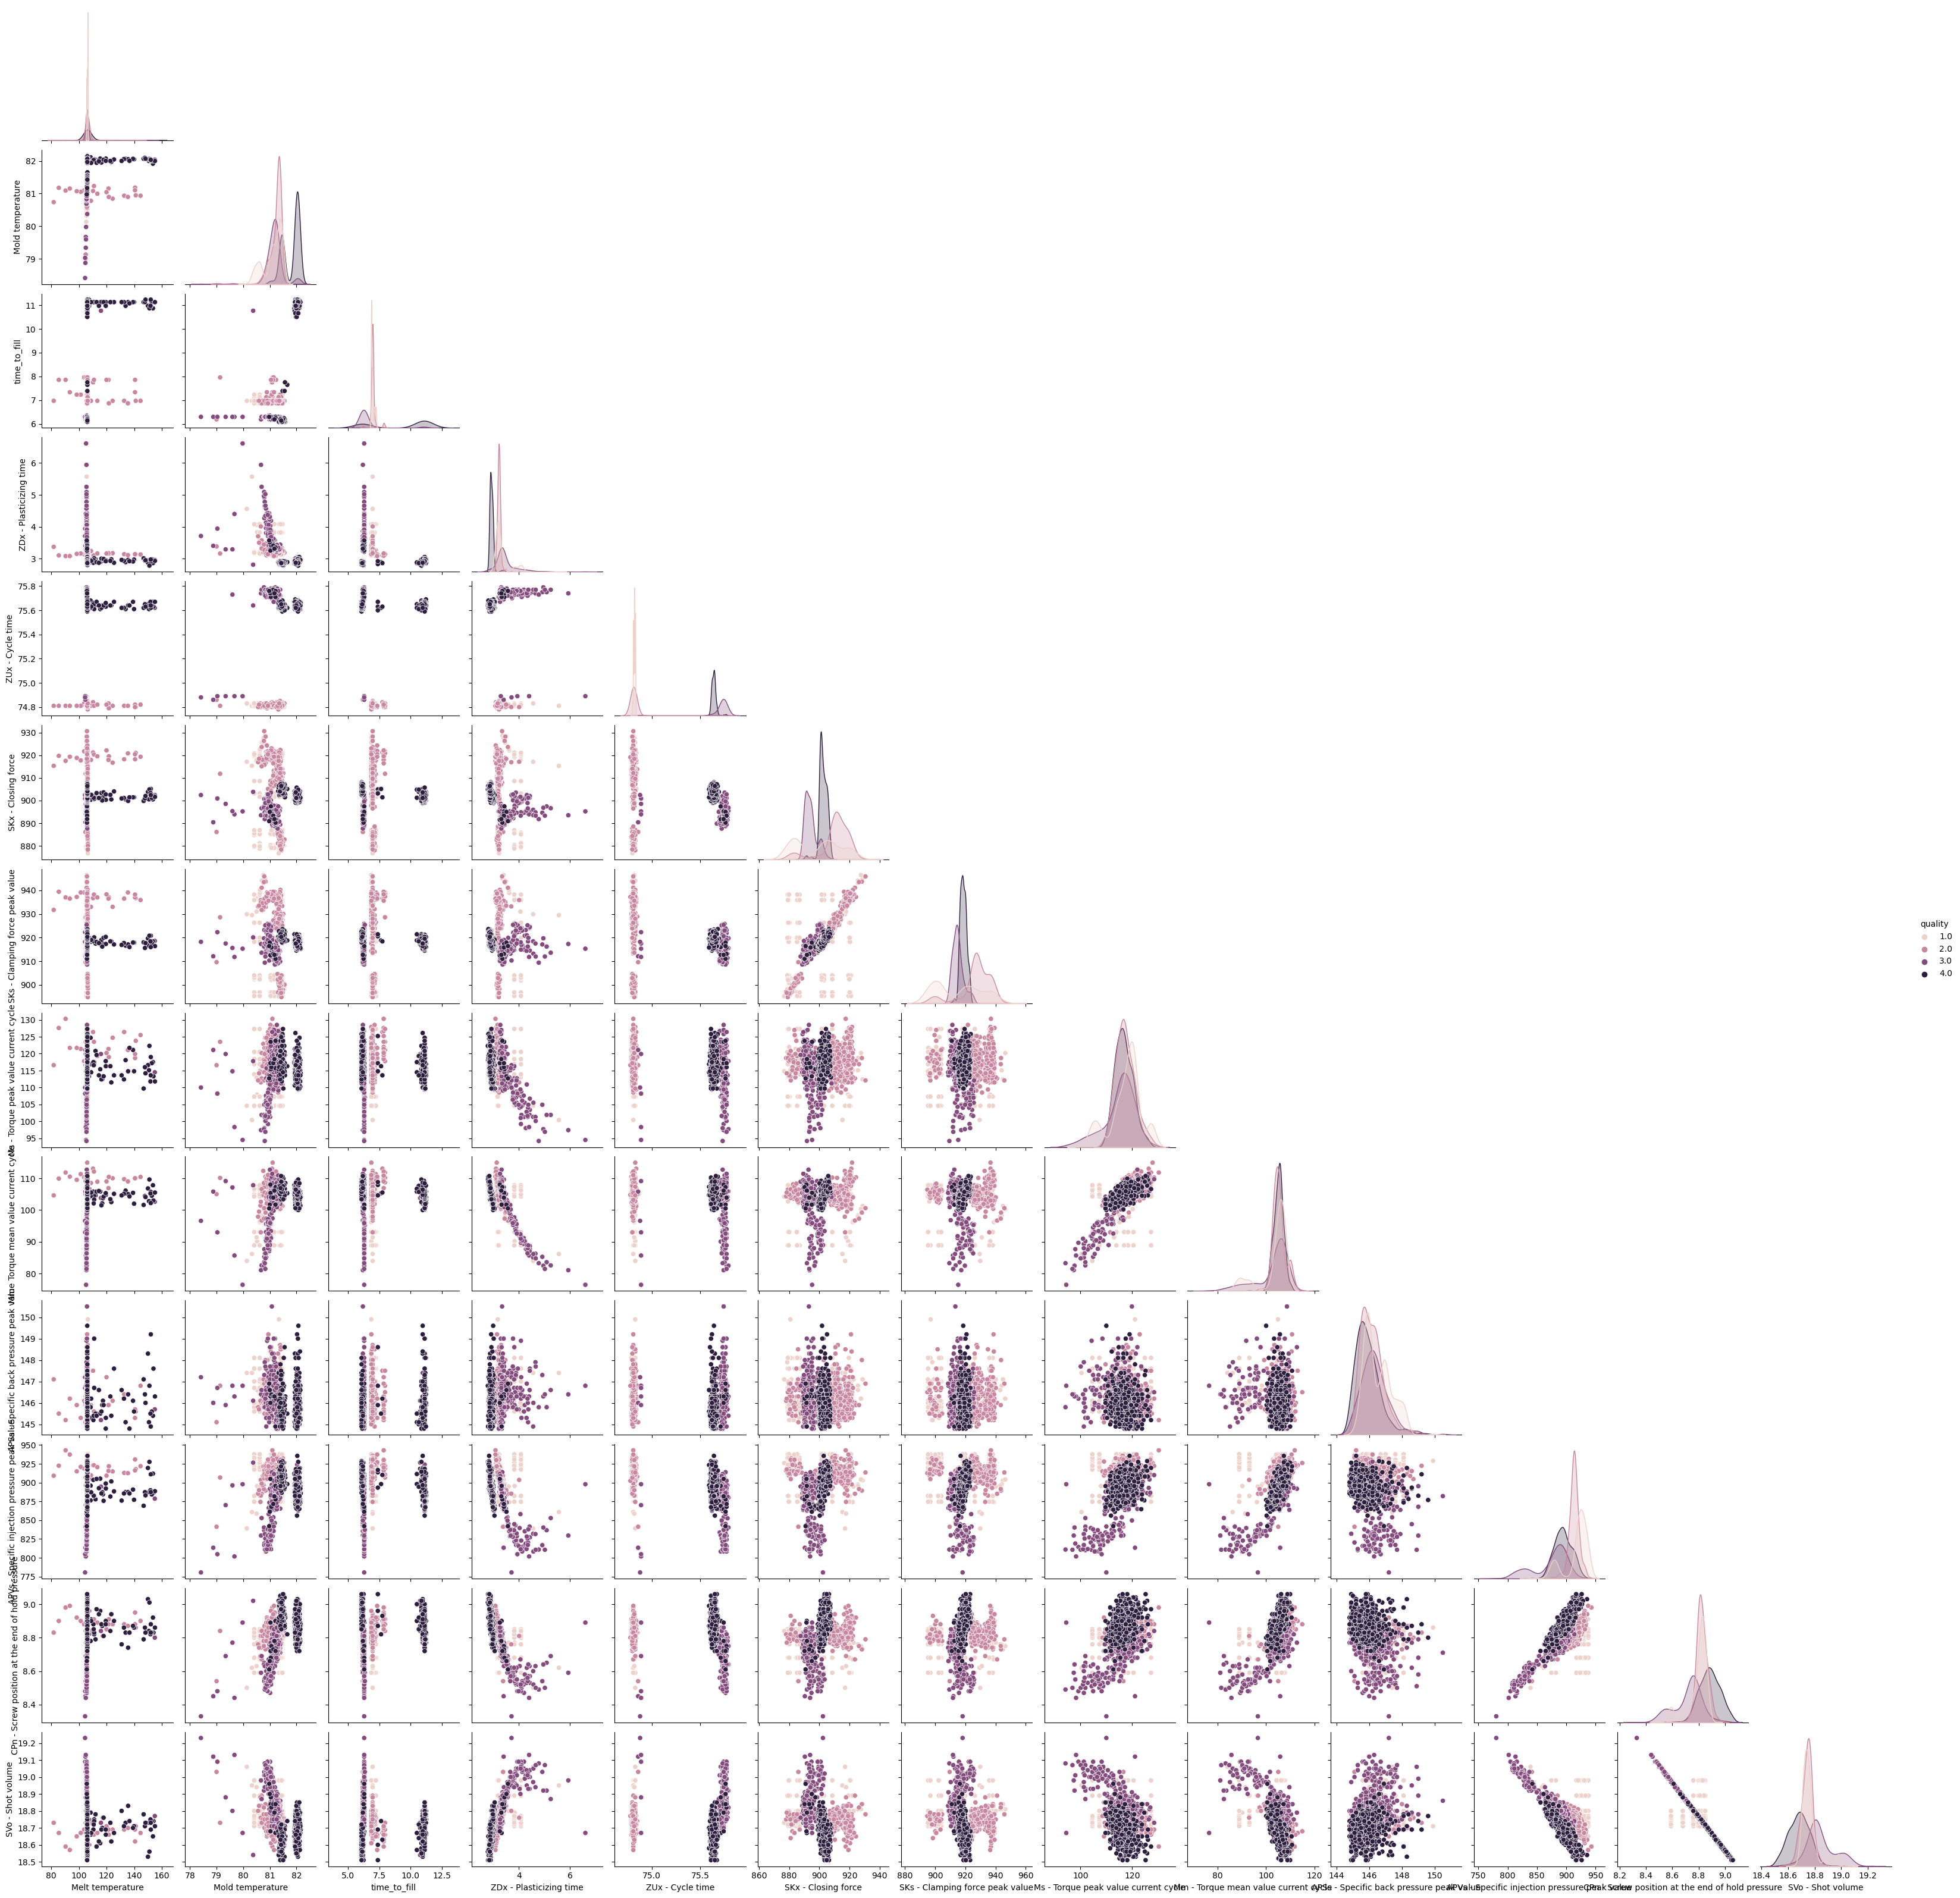

In [11]:
trajs=sns.pairplot(df1,hue=df1.columns[-1],corner=True)

In [12]:
#trajs.figure.savefig("trajectories.png")

# Lets devide data into TRAIN and TEST 

In [13]:
training_data, testing_data = train_test_split(df1, test_size=0.2, random_state=25)
X_train = training_data.iloc[:, 0:-1]
y_train = pd.DataFrame(training_data.iloc[:, -1])
X_test = testing_data.iloc[:, 0:-1]
y_test = pd.DataFrame(testing_data.iloc[:, -1])
X = df1.iloc[:, 0:-1]
y = pd.DataFrame(df1.iloc[:, -1])

In [14]:
X_train.reset_index(drop=True ,inplace=True)
y_train.reset_index(drop=True ,inplace=True)
X_test.reset_index(drop=True ,inplace=True)
y_test.reset_index(drop=True ,inplace=True)

In [15]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
y = np.ravel(y)

# Correlations

## Graphics

In [16]:
# for j in X.columns.array:
#     for i in X.columns.array:
#         if i != j:
#             plt.figure()
#             plt.title(j + " to " + i)
#             #plt.scatter(x = df1["Melt temperature"], y = df1[i])
#             sns.regplot(x = j, y = i, data = X)
#             #fig.savefig("correlation_between_"+i+"_"+j)
#             plt.show()

## Pearson correlation coefficient

Lets count all the correlations

In [17]:
X_corr = X.corr(method='pearson')
X_corr = X_corr.round(3)
strong_correlations_X= X_corr[X_corr.abs() > 0.7]
strong_correlations_X = strong_correlations_X[strong_correlations_X.abs() < 1]

## Lets build heatmaps


### For strong correlations

<Axes: >

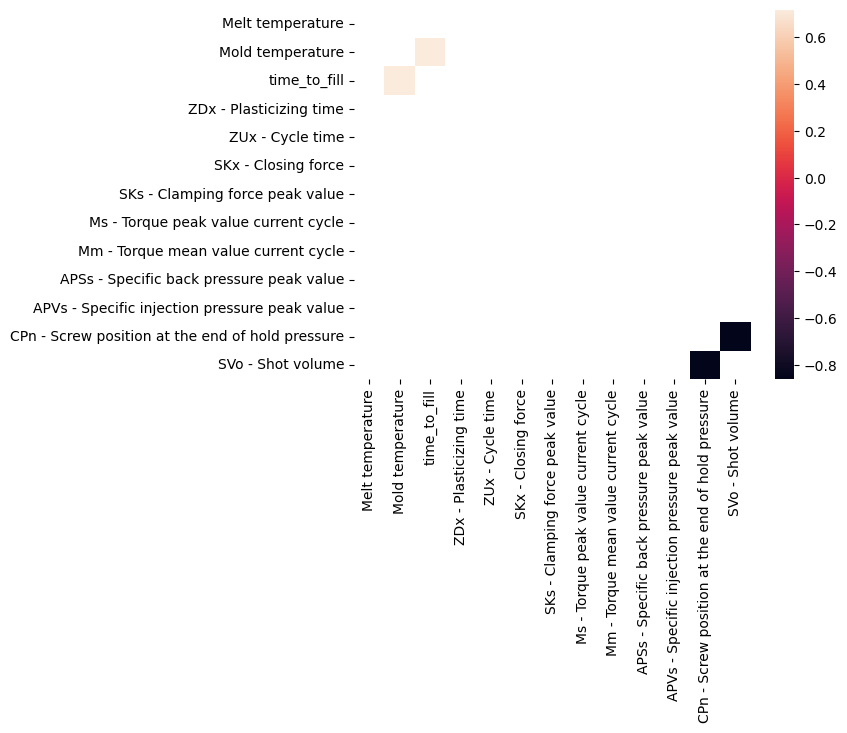

In [18]:
sns.heatmap(strong_correlations_X)

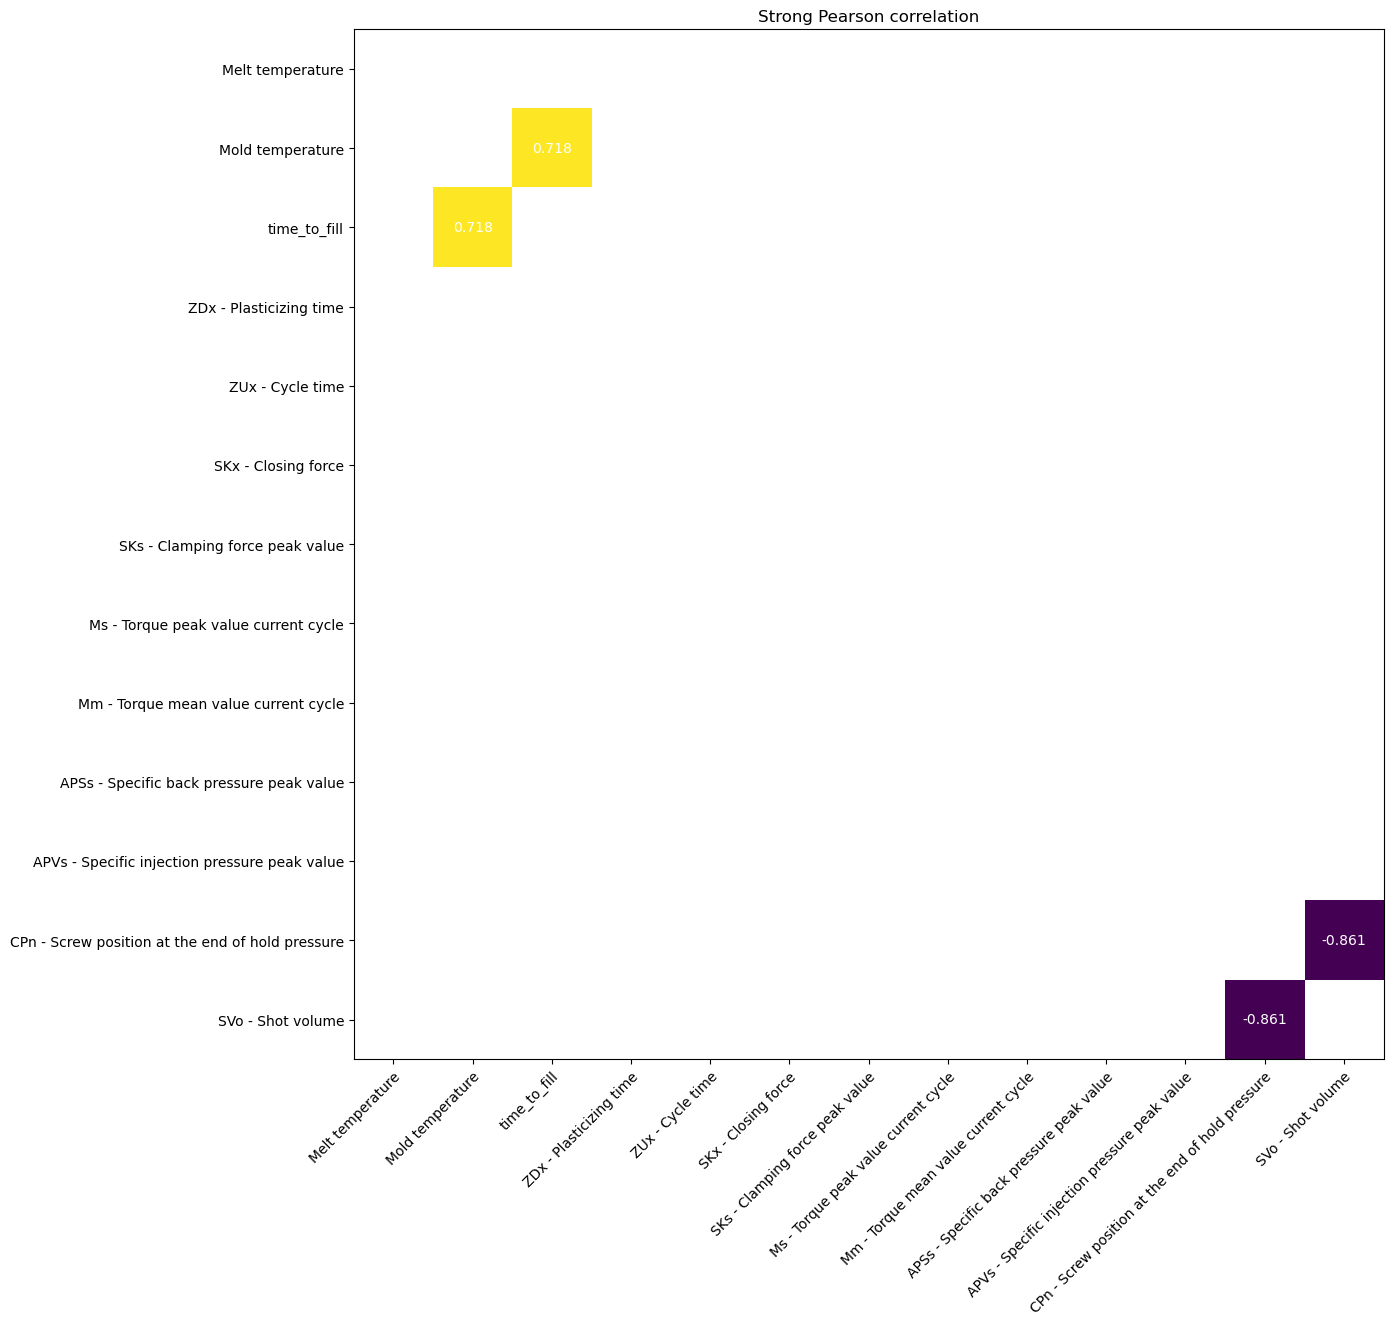

In [19]:
fig, ax = plt.subplots(figsize=(14,14))
im = ax.imshow(strong_correlations_X)
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(X_corr.columns)), labels=X_corr.columns)
ax.set_yticks(np.arange(len(X_corr.columns)), labels=X_corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(strong_correlations_X.columns)):
    for j in range(len(strong_correlations_X.columns)):
        text = ax.text(j, i, strong_correlations_X.values[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Strong Pearson correlation")
fig.tight_layout()
#fig.savefig('strong_correlations')
plt.show()

### All corelations

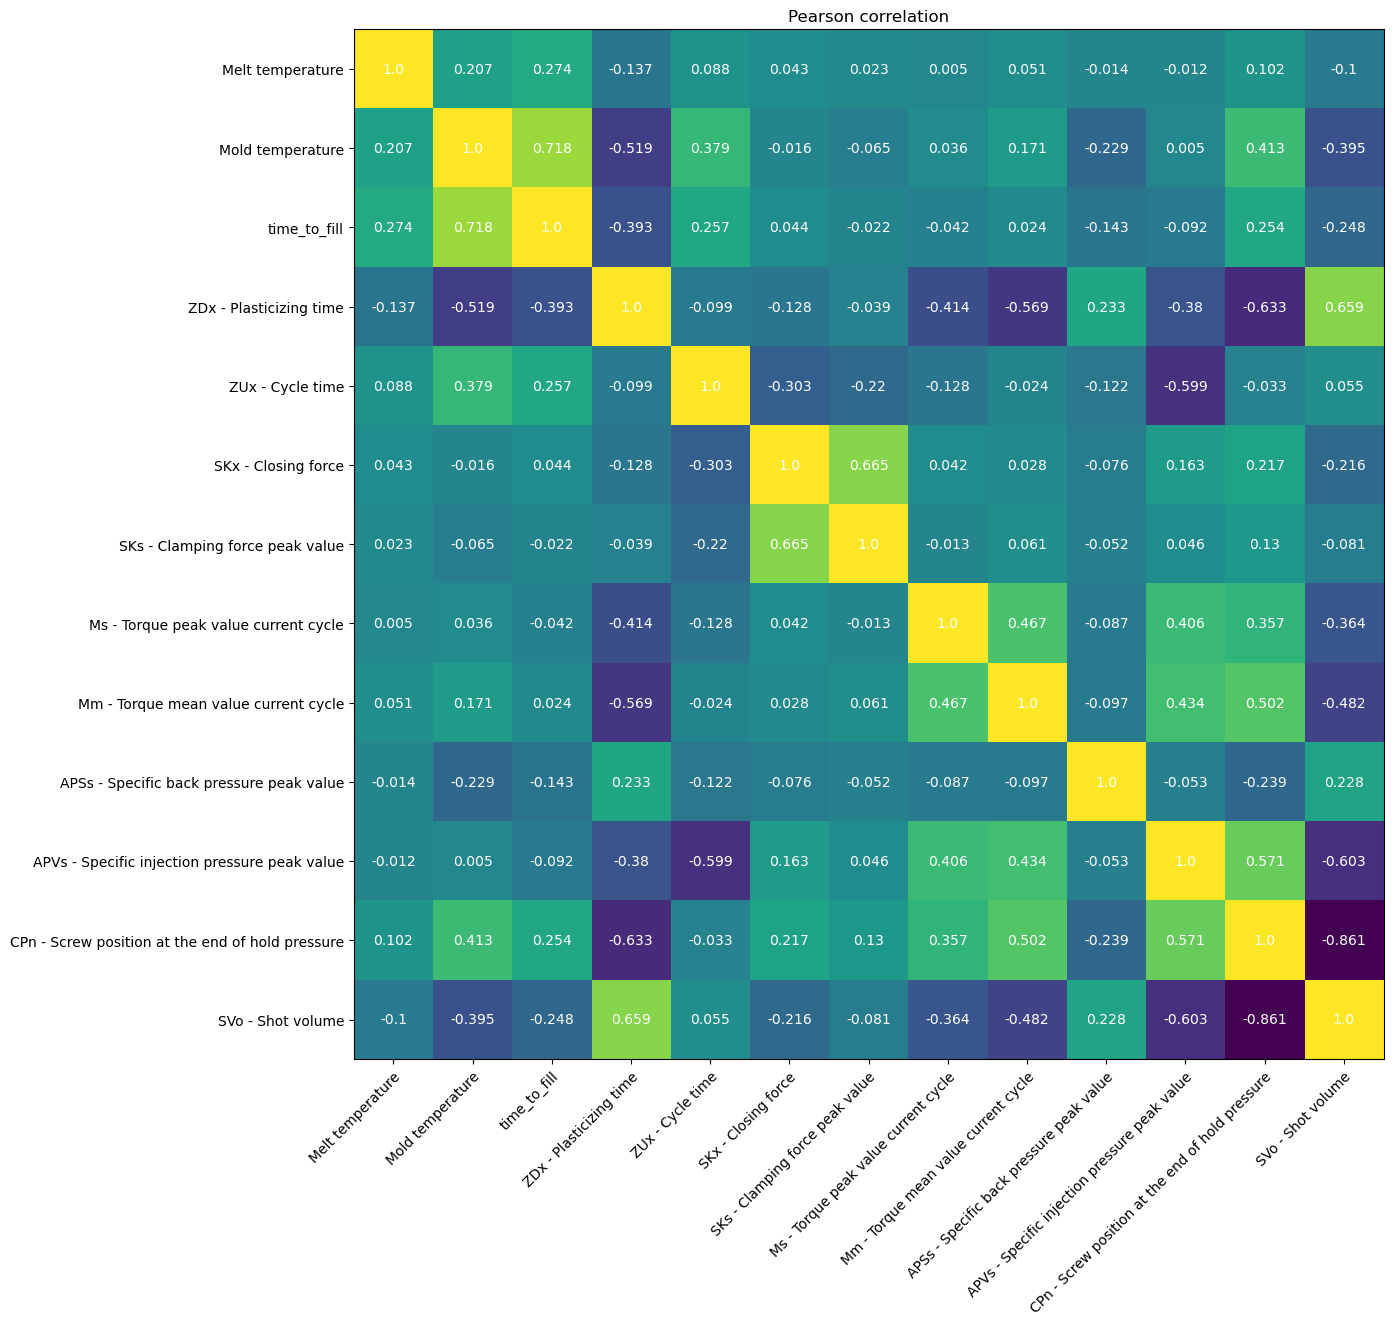

In [20]:
fig, ax = plt.subplots(figsize=(14,14))
im = ax.imshow(X_corr.values)
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(X_corr.columns)), labels=X_corr.columns)
ax.set_yticks(np.arange(len(X_corr.columns)), labels=X_corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(X_corr.columns)):
    for j in range(len(X_corr.columns)):
        text = ax.text(j, i, X_corr.values[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Pearson correlation")
fig.tight_layout()
#fig.savefig(fname='correlations')
plt.show()

In [21]:
X.columns

Index(['Melt temperature', 'Mold temperature', 'time_to_fill',
       'ZDx - Plasticizing time', 'ZUx - Cycle time', 'SKx - Closing force',
       'SKs - Clamping force peak value',
       'Ms - Torque peak value current cycle',
       'Mm - Torque mean value current cycle',
       'APSs - Specific back pressure peak value',
       'APVs - Specific injection pressure peak value',
       'CPn - Screw position at the end of hold pressure',
       'SVo - Shot volume'],
      dtype='object')

In [22]:
#X = X.drop(['SVo - Shot volume','Mold temperature'],axis=1)
#X_train = X_train.drop(['SVo - Shot volume','Mold temperature'],axis=1)
#X_test = X_test.drop(['SVo - Shot volume','Mold temperature'],axis=1)

In [23]:
DD = X['CPn - Screw position at the end of hold pressure']
DD.values

array([8.82, 8.59, 8.8 , ..., 8.97, 8.93, 9.01])

In [24]:
X.columns

Index(['Melt temperature', 'Mold temperature', 'time_to_fill',
       'ZDx - Plasticizing time', 'ZUx - Cycle time', 'SKx - Closing force',
       'SKs - Clamping force peak value',
       'Ms - Torque peak value current cycle',
       'Mm - Torque mean value current cycle',
       'APSs - Specific back pressure peak value',
       'APVs - Specific injection pressure peak value',
       'CPn - Screw position at the end of hold pressure',
       'SVo - Shot volume'],
      dtype='object')

In [25]:
from sklearn.feature_selection import VarianceThreshold
v_threshold = VarianceThreshold(threshold=(.8 * (1 - .8)))
v_threshold.fit(X)
v_threshold.get_support()

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False, False])

In [26]:
#X = X.drop(['CPn - Screw position at the end of hold pressure','ZDx - Plasticizing time'],axis=1)
#X_train = X_train.drop(['CPn - Screw position at the end of hold pressure','ZDx - Plasticizing time'],axis=1)
#X_test = X_test.drop(['CPn - Screw position at the end of hold pressure','ZDx - Plasticizing time'],axis=1)

In [27]:
X.head()

Melt temperature  Mold temperature  time_to_fill  ZDx - Plasticizing time  \
0        106.476184            80.617         7.124                     3.16   
1        105.505000            81.362         6.968                     3.16   
2        105.505000            80.411         6.864                     4.08   
3        106.474827            81.162         6.864                     3.16   
4        106.466140            81.471         6.864                     3.22   

   ZUx - Cycle time  SKx - Closing force  SKs - Clamping force peak value  \
0             74.83           886.900000                       904.000000   
1             74.81           919.409791                       935.900000   
2             74.81           908.600000                       902.344823   
3             74.82           879.410871                       902.033653   
4             74.83           885.644260                       902.821269   

   Ms - Torque peak value current cycle  Mm - Torque mean value current cycle  \
0                                 116.9                            104.300000   
1                                 113.9                            104.900000   
2                                 120.5                            106.503496   
3                                 127.3                            104.900000   
4                                 120.5                            106.700000   

   APSs - Specific back pressure peak value  \
0                                     145.6   
1                                     145.6   
2                                     147.0   
3                                     145.6   
4                                     145.6   

   APVs - Specific injection pressure peak value  \
0                                          922.3   
1                                          930.5   
2                                          933.1   
3                                          922.3   
4                                          917.5   

   CPn - Screw position at the end of hold pressure  SVo - Shot volume  
0                                              8.82              18.73  
1                                              8.59              18.73  
2                                              8.80              18.98  
3                                              8.85              18.73  
4                                              8.80              18.75

### Normalization Using sklearn

In [28]:
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [29]:
X_train_norm = pd.DataFrame(X_train_norm, columns=list(X_train.columns[:]))
X_test_norm = pd.DataFrame(X_test_norm, columns=list(X_test.columns[:]))

In [30]:
X_train_norm.head()

Melt temperature  Mold temperature  time_to_fill  ZDx - Plasticizing time  \
0          0.332264          0.953600      0.979798                 0.036649   
1          0.334543          0.777067      0.171717                 0.117801   
2          0.335157          0.796800      0.171717                 0.130890   
3          0.333970          0.786933      0.171717                 0.125654   
4          0.329699          0.758400      0.040404                 0.130890   

   ZUx - Cycle time  SKx - Closing force  SKs - Clamping force peak value  \
0              0.83             0.458256                         0.468085   
1              0.02             0.667904                         0.624758   
2              0.02             0.567718                         0.588008   
3              0.03             0.684601                         0.663443   
4              0.94             0.243043                         0.388781   

   Ms - Torque peak value current cycle  Mm - Torque mean value current cycle  \
0                              0.678670                              0.718750   
1                              0.795014                              0.716146   
2                              0.570637                              0.700521   
3                              0.520776                              0.692708   
4                              0.562327                              0.755208   

   APSs - Specific back pressure peak value  \
0                                  0.254902   
1                                  0.235294   
2                                  0.352941   
3                                  0.156863   
4                                  0.254902   

   APVs - Specific injection pressure peak value  \
0                                       0.651692   
1                                       0.875077   
2                                       0.787692   
3                                       0.783385   
4                                       0.726154   

   CPn - Screw position at the end of hold pressure  SVo - Shot volume  
0                                          0.753425           0.236111  
1                                          0.630137           0.375000  
2                                          0.657534           0.347222  
3                                          0.698630           0.305556  
4                                          0.616438           0.375000

### Standardization Using sklearn

In [31]:
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = list(X_train.columns[:])

# apply standardization on numerical features
for i in num_cols:
    scale = StandardScaler().fit(X_train_stand[[i]])
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [32]:
X_train_stand.head()

Melt temperature  Mold temperature  time_to_fill  ZDx - Plasticizing time  \
0         -0.146125          1.553125      2.190307                -0.907218   
1         -0.117783         -0.012901     -0.283773                 0.020429   
2         -0.110146          0.162154     -0.283773                 0.170049   
3         -0.124911          0.074626     -0.283773                 0.110201   
4         -0.178031         -0.178493     -0.685811                 0.170049   

   ZUx - Cycle time  SKx - Closing force  SKs - Clamping force peak value  \
0          0.917477            -0.036210                        -0.034587   
1         -0.954128             0.976905                         0.714522   
2         -0.954128             0.492761                         0.538805   
3         -0.931022             1.057595                         0.899487   
4          1.171646            -1.076220                        -0.413766   

   Ms - Torque peak value current cycle  Mm - Torque mean value current cycle  \
0                              0.399312                             -0.009517   
1                              1.233158                             -0.030458   
2                             -0.374974                             -0.156107   
3                             -0.732337                             -0.218931   
4                             -0.434535                              0.283663   

   APSs - Specific back pressure peak value  \
0                                 -0.135781   
1                                 -0.262191   
2                                  0.496266   
3                                 -0.767829   
4                                 -0.135781   

   APVs - Specific injection pressure peak value  \
0                                      -0.542520   
1                                       0.862160   
2                                       0.312670   
3                                       0.285583   
4                                      -0.074294   

   CPn - Screw position at the end of hold pressure  SVo - Shot volume  
0                                          0.726294          -0.784103  
1                                         -0.188033           0.246326  
2                                          0.015151           0.040240  
3                                          0.319927          -0.268889  
4                                         -0.289624           0.246326

In [33]:
datasets = {
    'Raw data' : [X_train, X_test],
    'Standardized data' : [X_train_stand, X_test_stand],
    'Normalized data' : [X_train_norm, X_test_norm]
}

## Lets compare Unscaled, Normalized and Standartized data

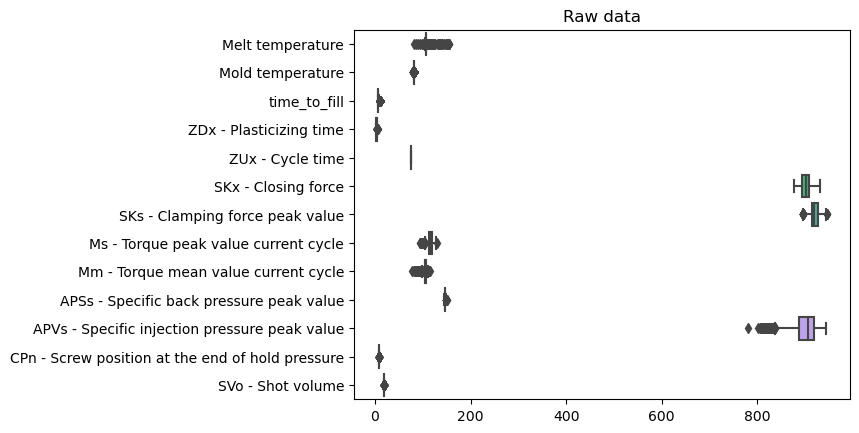

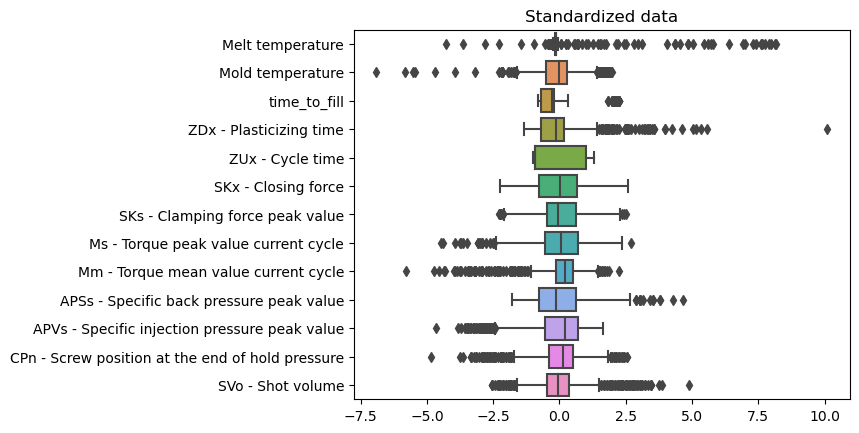

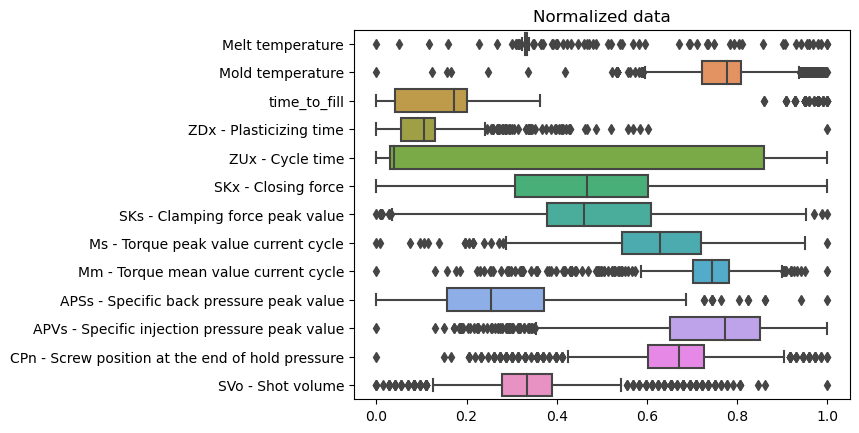

In [34]:
for key, values in datasets.items():
    sns.boxplot(data=values[0], orient='h').set(title=key)
    plt.show()

# Is regression models applicable?

## Linear regression

In [35]:
# Hyper parameter tuning:
# - model: model for which we want to tune parameters
# - params: dictionary for parameters which we want to tune
# - x: train features set
# - y: train target set
# return the list of best parameters
def hyper_param_tuning(model, params, x,y):
    #cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
    clf = GridSearchCV(model, param_grid = params, cv = 5, verbose=True, n_jobs=-1)
    clf.fit(x, y)
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    params = clf.cv_results_['params']
    print("Best: %f using %s" % (clf.best_score_, clf.best_params_))
    # for mean, stdev, param in zip(means, stds, params):
    #     print("%f (%f) with: %r" % (mean, stdev, param))
    return clf.best_params_, clf.best_estimator_

def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test , y_pred)
    cm_df = pd.DataFrame(cm,
                     index = ['Waste','Acceptable','Target','Inefficient'], 
                     columns = ['Waste','Acceptable','Target','Inefficient'])
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()

# Score of the model:
# - model: model for which we want to estimate
# - x_test: test features set
# - y_test: test target set
# return the default score of the model and classification report
def score_of_model(y_test, y_pred):
    print("Classification report: ")
    clas_rep = classification_report(y_test,y_pred)
    print(clas_rep)
    print("Accuracy score: ")
    accuracy = accuracy_score(y_test,np.around( y_pred))
    print(accuracy)
    print("Confusion Matrix: ")
    plot_confusion_matrix(y_test,y_pred)
    return accuracy, clas_rep

Raw data
Classification report: 
              precision    recall  f1-score   support

         1.0       0.86      0.70      0.77        79
         2.0       0.74      0.88      0.81        83
         3.0       0.89      0.91      0.90        56
         4.0       0.94      0.93      0.94        73

    accuracy                           0.85       291
   macro avg       0.86      0.85      0.85       291
weighted avg       0.85      0.85      0.85       291

Accuracy score: 
0.8487972508591065
Confusion Matrix: 


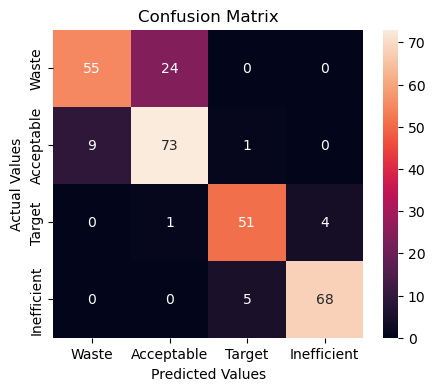

----------------------------------
Standardized data
Classification report: 
              precision    recall  f1-score   support

         1.0       0.86      0.70      0.77        79
         2.0       0.74      0.88      0.81        83
         3.0       0.89      0.91      0.90        56
         4.0       0.94      0.93      0.94        73

    accuracy                           0.85       291
   macro avg       0.86      0.85      0.85       291
weighted avg       0.85      0.85      0.85       291

Accuracy score: 
0.8487972508591065
Confusion Matrix: 


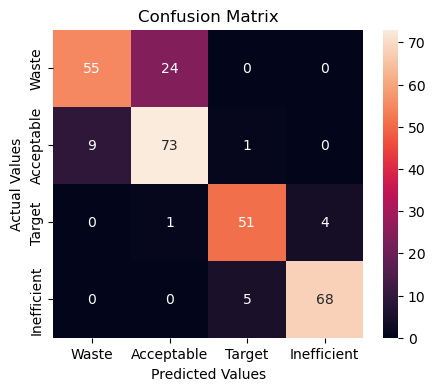

----------------------------------
Normalized data
Classification report: 
              precision    recall  f1-score   support

         1.0       0.86      0.70      0.77        79
         2.0       0.74      0.88      0.81        83
         3.0       0.89      0.91      0.90        56
         4.0       0.94      0.93      0.94        73

    accuracy                           0.85       291
   macro avg       0.86      0.85      0.85       291
weighted avg       0.85      0.85      0.85       291

Accuracy score: 
0.8487972508591065
Confusion Matrix: 


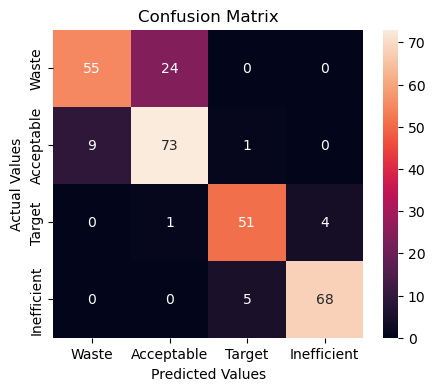

----------------------------------


In [36]:
for key, X_data in datasets.items():
    print(key)
    linear_reg = LinearRegression().fit(X_data[0],y_train)
    y_pred = np.around(linear_reg.predict(X_data[1]))
    lin_reg_score, _ = score_of_model(y_pred=y_pred, y_test=y_test)
    print("----------------------------------")

## Polynomial Regression

In [37]:
def poly_reg_model(degree, X_train, y_train, X_test):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = poly.fit_transform(np.array(X_train))
    poly_features_test = poly.fit_transform(np.array(X_test))
    poly_reg_model = LinearRegression().fit(poly_features, y_train)
    return pd.DataFrame(np.around(poly_reg_model.predict(poly_features_test))).apply(lambda x: [1 if y <= 1 else y for y in x]).apply(lambda x: [4 if y >= 4 else y for y in x])
    

Degree 2.000000
Raw data
Classification report: 
              precision    recall  f1-score   support

         1.0       0.93      0.78      0.85        79
         2.0       0.83      0.92      0.87        83
         3.0       0.90      0.93      0.91        56
         4.0       0.95      0.96      0.95        73

    accuracy                           0.89       291
   macro avg       0.90      0.90      0.90       291
weighted avg       0.90      0.89      0.89       291

Accuracy score: 
0.8934707903780069
Confusion Matrix: 


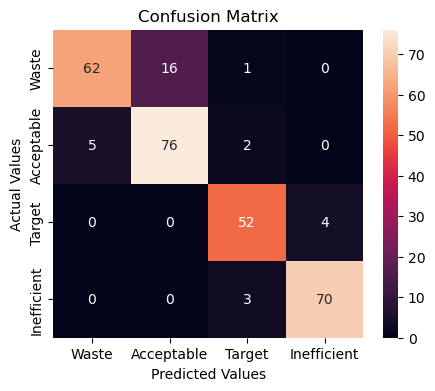

---------------------------
Standardized data
Classification report: 
              precision    recall  f1-score   support

         1.0       0.93      0.78      0.85        79
         2.0       0.83      0.92      0.87        83
         3.0       0.90      0.93      0.91        56
         4.0       0.95      0.96      0.95        73

    accuracy                           0.89       291
   macro avg       0.90      0.90      0.90       291
weighted avg       0.90      0.89      0.89       291

Accuracy score: 
0.8934707903780069
Confusion Matrix: 


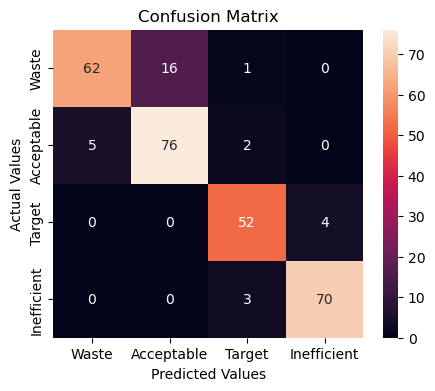

---------------------------
Normalized data
Classification report: 
              precision    recall  f1-score   support

         1.0       0.93      0.78      0.85        79
         2.0       0.83      0.92      0.87        83
         3.0       0.90      0.93      0.91        56
         4.0       0.95      0.96      0.95        73

    accuracy                           0.89       291
   macro avg       0.90      0.90      0.90       291
weighted avg       0.90      0.89      0.89       291

Accuracy score: 
0.8934707903780069
Confusion Matrix: 


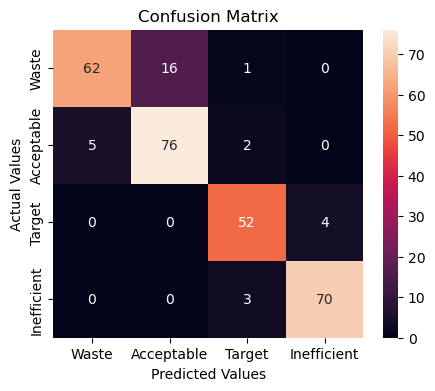

---------------------------
#####################################################
Degree 3.000000
Raw data
Classification report: 
              precision    recall  f1-score   support

         1.0       0.86      0.61      0.71        79
         2.0       0.76      0.90      0.82        83
         3.0       0.79      0.88      0.83        56
         4.0       0.84      0.85      0.84        73

    accuracy                           0.80       291
   macro avg       0.81      0.81      0.80       291
weighted avg       0.81      0.80      0.80       291

Accuracy score: 
0.8041237113402062
Confusion Matrix: 


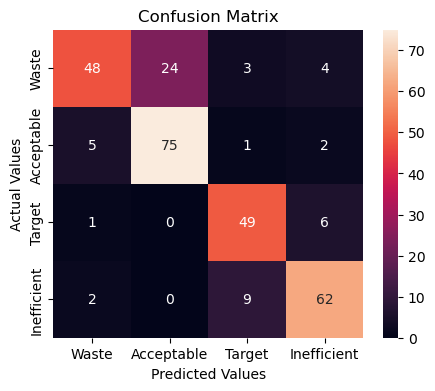

---------------------------
Standardized data
Classification report: 
              precision    recall  f1-score   support

         1.0       0.87      0.66      0.75        79
         2.0       0.82      0.90      0.86        83
         3.0       0.75      0.86      0.80        56
         4.0       0.83      0.85      0.84        73

    accuracy                           0.81       291
   macro avg       0.81      0.82      0.81       291
weighted avg       0.82      0.81      0.81       291

Accuracy score: 
0.8144329896907216
Confusion Matrix: 


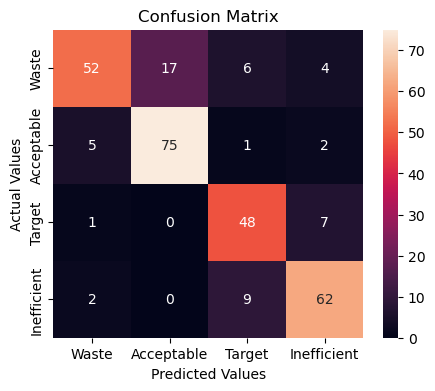

---------------------------
Normalized data
Classification report: 
              precision    recall  f1-score   support

         1.0       0.87      0.66      0.75        79
         2.0       0.82      0.90      0.86        83
         3.0       0.75      0.86      0.80        56
         4.0       0.83      0.85      0.84        73

    accuracy                           0.81       291
   macro avg       0.81      0.82      0.81       291
weighted avg       0.82      0.81      0.81       291

Accuracy score: 
0.8144329896907216
Confusion Matrix: 


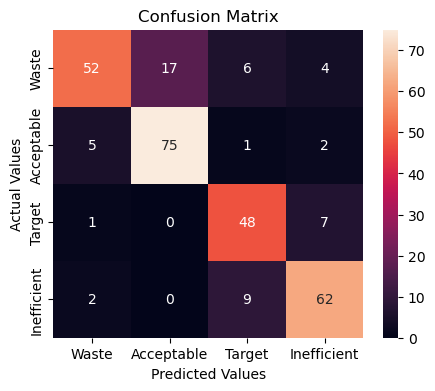

---------------------------
#####################################################


In [38]:
for i in range(2,4):
    print("Degree %f" % i)
    for key, X_data in datasets.items():
        print(key)
        y_pred = poly_reg_model(i, X_data[0], y_train, X_data[1])
        poly_reg_score, _ = score_of_model(y_pred=y_pred, y_test=y_test)
        print("---------------------------")
    print("#####################################################")


## Ridge Regression

In [39]:
def ridge_regression(X_train, y_train, X_test):
    ridge_model = Ridge(alpha=1.0)
    ridge_model.fit(X_train, y_train)
    ridge_model_pred = np.around(ridge_model.predict(X_test))
    return ridge_model_pred

Raw data
Classification report: 
              precision    recall  f1-score   support

         1.0       0.86      0.70      0.77        79
         2.0       0.74      0.88      0.81        83
         3.0       0.89      0.91      0.90        56
         4.0       0.94      0.93      0.94        73

    accuracy                           0.85       291
   macro avg       0.86      0.85      0.85       291
weighted avg       0.85      0.85      0.85       291

Accuracy score: 
0.8487972508591065
Confusion Matrix: 


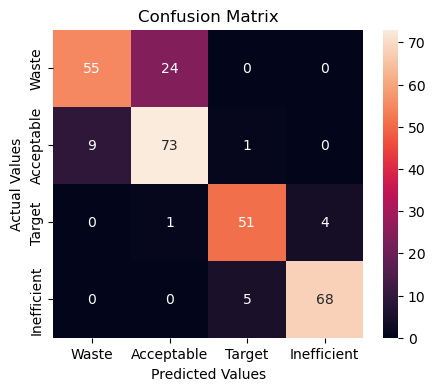

--------------------
Standardized data
Classification report: 
              precision    recall  f1-score   support

         1.0       0.86      0.70      0.77        79
         2.0       0.74      0.88      0.81        83
         3.0       0.89      0.91      0.90        56
         4.0       0.94      0.93      0.94        73

    accuracy                           0.85       291
   macro avg       0.86      0.85      0.85       291
weighted avg       0.85      0.85      0.85       291

Accuracy score: 
0.8487972508591065
Confusion Matrix: 


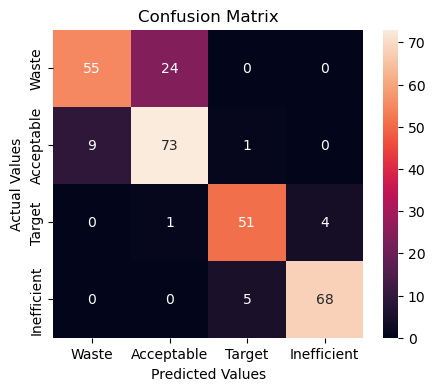

--------------------
Normalized data
Classification report: 
              precision    recall  f1-score   support

         1.0       0.87      0.70      0.77        79
         2.0       0.75      0.89      0.81        83
         3.0       0.89      0.91      0.90        56
         4.0       0.94      0.93      0.94        73

    accuracy                           0.85       291
   macro avg       0.86      0.86      0.86       291
weighted avg       0.86      0.85      0.85       291

Accuracy score: 
0.852233676975945
Confusion Matrix: 


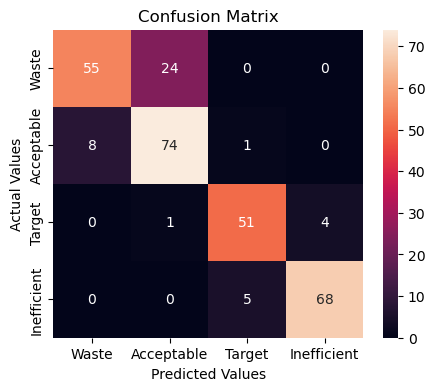

--------------------


In [40]:
for key, X_data in datasets.items():
    print(key)
    y_pred = ridge_regression(X_data[0], y_train, X_data[1])
    a, _ = score_of_model(y_test, y_pred)
    print("--------------------")

## Lasso regression

In [41]:
def lasso_regression(X_train, y_train, X_test):
    lasso_model = Lasso(alpha=0.0001)
    lasso_model.fit(X_train, y_train)
    lasso_model_pred = np.around(lasso_model.predict(X_test))
    return lasso_model_pred

Raw data
Classification report: 
              precision    recall  f1-score   support

         1.0       0.86      0.70      0.77        79
         2.0       0.74      0.88      0.81        83
         3.0       0.89      0.91      0.90        56
         4.0       0.94      0.93      0.94        73

    accuracy                           0.85       291
   macro avg       0.86      0.85      0.85       291
weighted avg       0.85      0.85      0.85       291

Accuracy score: 
0.8487972508591065
Confusion Matrix: 


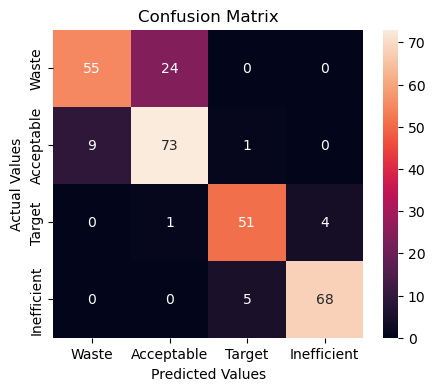

--------------------
Standardized data
Classification report: 
              precision    recall  f1-score   support

         1.0       0.86      0.70      0.77        79
         2.0       0.74      0.88      0.81        83
         3.0       0.89      0.91      0.90        56
         4.0       0.94      0.93      0.94        73

    accuracy                           0.85       291
   macro avg       0.86      0.85      0.85       291
weighted avg       0.85      0.85      0.85       291

Accuracy score: 
0.8487972508591065
Confusion Matrix: 


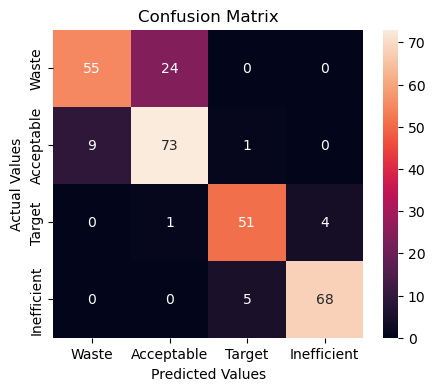

--------------------
Normalized data
Classification report: 
              precision    recall  f1-score   support

         1.0       0.86      0.70      0.77        79
         2.0       0.74      0.88      0.81        83
         3.0       0.89      0.91      0.90        56
         4.0       0.94      0.93      0.94        73

    accuracy                           0.85       291
   macro avg       0.86      0.85      0.85       291
weighted avg       0.85      0.85      0.85       291

Accuracy score: 
0.8487972508591065
Confusion Matrix: 


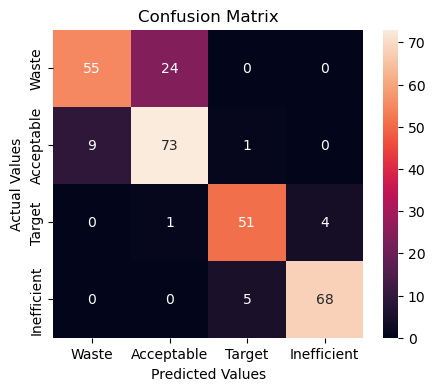

--------------------


In [42]:
for key, X_data in datasets.items():
    print(key)
    y_pred = lasso_regression(X_data[0], y_train, X_data[1])
    a, _ = score_of_model(y_test, y_pred)
    print("--------------------")

## Regression trees

In [43]:
def decision_tree_regressor(x_train, y_train):
    criterion = ['poisson', 'absolute_error','friedman_mse','squared_error']
    max_depth = [2,4,6,8,10,12]
    parameters = dict(criterion=criterion, max_depth=max_depth)
    best_params, best_model = hyper_param_tuning(DecisionTreeRegressor(), parameters, x_train, y_train)
    return best_model


Raw data
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best: 0.934156 using {'criterion': 'poisson', 'max_depth': 6}
Classification report: 
              precision    recall  f1-score   support

         1.0       0.96      0.89      0.92        79
         2.0       0.89      0.95      0.92        83
         3.0       0.93      0.91      0.92        56
         4.0       0.95      0.96      0.95        73

    accuracy                           0.93       291
   macro avg       0.93      0.93      0.93       291
weighted avg       0.93      0.93      0.93       291

Accuracy score: 
0.9278350515463918
Confusion Matrix: 


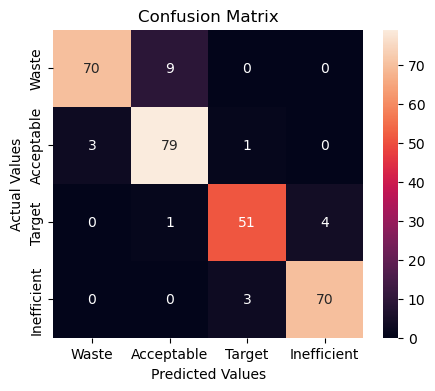

Standardized data
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best: 0.936183 using {'criterion': 'poisson', 'max_depth': 6}
Classification report: 
              precision    recall  f1-score   support

         1.0       0.96      0.89      0.92        79
         2.0       0.89      0.95      0.92        83
         3.0       0.94      0.91      0.93        56
         4.0       0.95      0.97      0.96        73

    accuracy                           0.93       291
   macro avg       0.93      0.93      0.93       291
weighted avg       0.93      0.93      0.93       291

Accuracy score: 
0.9312714776632303
Confusion Matrix: 


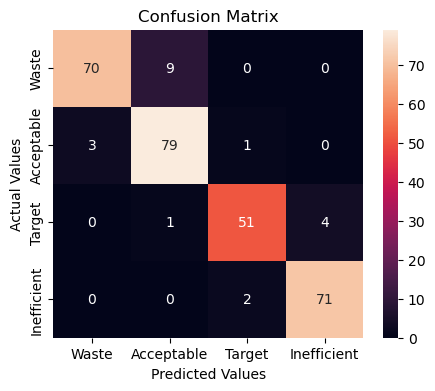

Normalized data
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best: 0.936731 using {'criterion': 'poisson', 'max_depth': 6}
Classification report: 
              precision    recall  f1-score   support

         1.0       0.96      0.89      0.92        79
         2.0       0.90      0.95      0.92        83
         3.0       0.93      0.93      0.93        56
         4.0       0.95      0.96      0.95        73

    accuracy                           0.93       291
   macro avg       0.93      0.93      0.93       291
weighted avg       0.93      0.93      0.93       291

Accuracy score: 
0.9312714776632303
Confusion Matrix: 


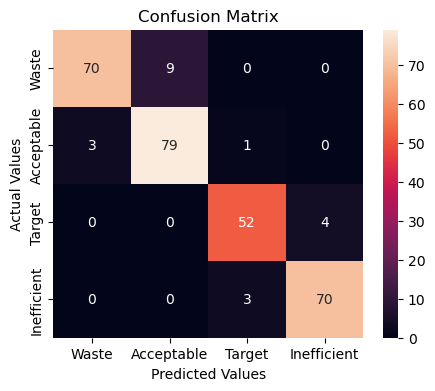

In [44]:
for key, X_data in datasets.items():
    print(key)
    dc = decision_tree_regressor(X_data[0], y_train)
    y_pred = np.round(dc.predict(X_data[1]))
    a, _ = score_of_model(y_test, y_pred)

## Random Forest

In [45]:
def scores_plot(n_estimators, train_results, test_results):
    line1, = plt.plot(n_estimators, train_results, color="r", label="Training Score")
    line2, = plt.plot(n_estimators, test_results, color="g", label="Testing Score")
    from matplotlib.legend_handler import HandlerLine2D
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.legend(handler_map={line2: HandlerLine2D(numpoints=2)})
    plt.ylabel('Accuracy')
    plt.xlabel('n_estimators')
    plt.show()

#Feature importance based on mean decrease in impurity
def feature_importance_impurity(rand_forest, X_train, y_train):
    importances = rand_forest.feature_importances_
    forest_importances = pd.Series(importances, index=X_train.columns.array)
    std = np.std([tree.feature_importances_ for tree in rand_forest.estimators_], axis=0)

    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    plt.show()

#Feature importance based on feature permutation
def feature_importance_permutations(rand_forest,X_train, y_train):
    result = permutation_importance(
        rand_forest, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
    )
    forest_importances = pd.Series(result.importances_mean, index=X_train.columns.array)
    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
    ax.set_title("Feature importances using permutation on full model")
    ax.set_ylabel("Mean accuracy decrease")
    fig.tight_layout()
    plt.show()

def random_forest_regressor(X_train, y_train, X_test):
    n_estimators = [10, 100, 1000]
    max_features = ['sqrt', 'log2']
    max_depth = [10, 50, 110]
    grid = dict(n_estimators=n_estimators, max_features=max_features, max_depth = max_depth)

    best_params, best_model = hyper_param_tuning(RandomForestRegressor(), grid, X_train, y_train)
    #model = RandomForestRegressor(n_estimators=best_params['n_estimators'],
     #                             max_features=best_params['max_features'],
      #                            max_depth= best_params['max_depth']).fit(X_train, y_train)
    y_pred = np.round(best_model.predict(X_test))

    # Plot results for different number of n_estimators
    train_results = []
    test_results = []
    for nb_trees in n_estimators:
        rf = RandomForestRegressor(n_estimators=nb_trees, 
                                    max_features=best_params['max_features'],
                                    max_depth= best_params['max_depth']).fit(X_train, y_train)
        pr_tr = np.around(rf.predict(X_train))
        pr_te = np.around(rf.predict(X_test))
        train_results.append(accuracy_score(y_train, pr_tr))
        test_results.append(accuracy_score(y_test, pr_te))
    scores_plot(n_estimators, train_results, test_results)
    feature_importance_impurity(best_model, X_train, y_train)
    feature_importance_permutations(best_model, X_train, y_train)
    return y_pred
    

Raw data
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best: 0.957193 using {'max_depth': 110, 'max_features': 'log2', 'n_estimators': 1000}


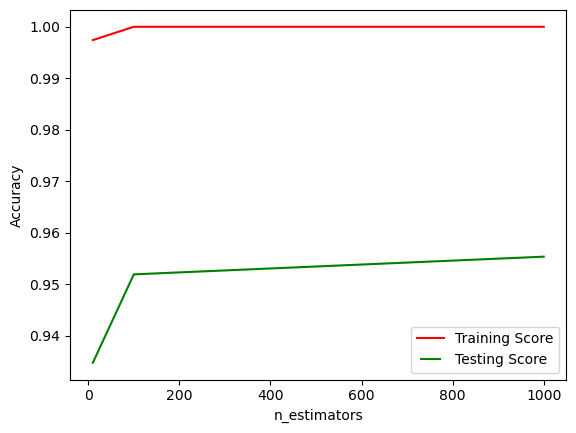

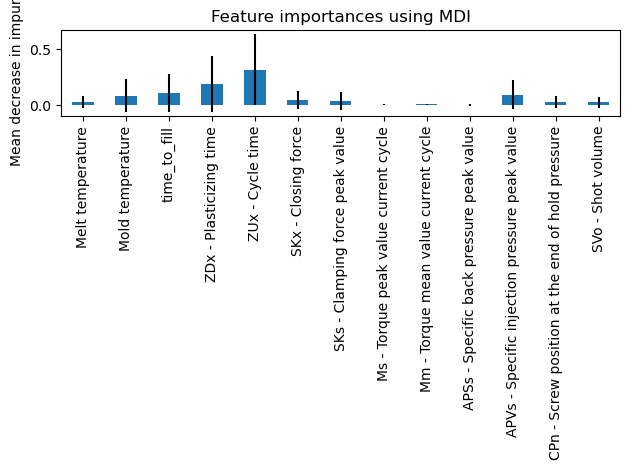

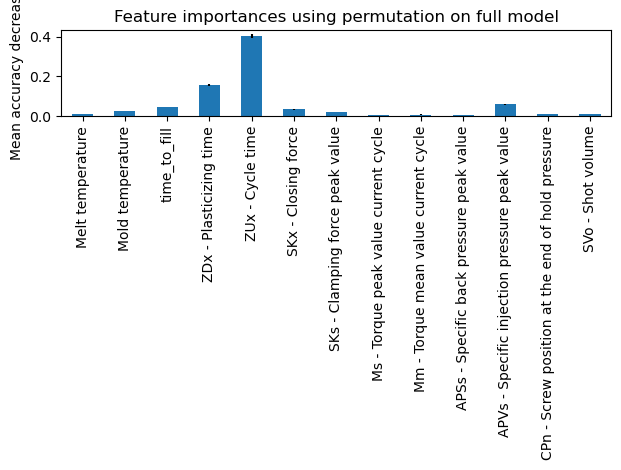

Classification report: 
              precision    recall  f1-score   support

         1.0       0.96      0.96      0.96        79
         2.0       0.96      0.95      0.96        83
         3.0       0.95      0.93      0.94        56
         4.0       0.95      0.97      0.96        73

    accuracy                           0.96       291
   macro avg       0.95      0.95      0.95       291
weighted avg       0.96      0.96      0.96       291

Accuracy score: 
0.9553264604810997
Confusion Matrix: 


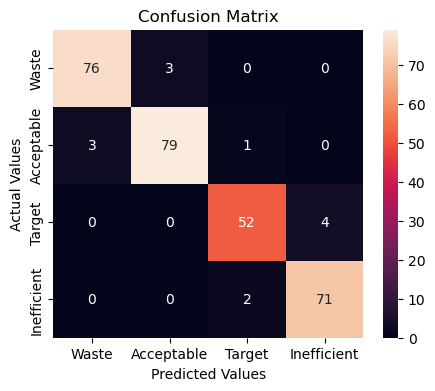

Standardized data
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best: 0.957166 using {'max_depth': 50, 'max_features': 'log2', 'n_estimators': 1000}


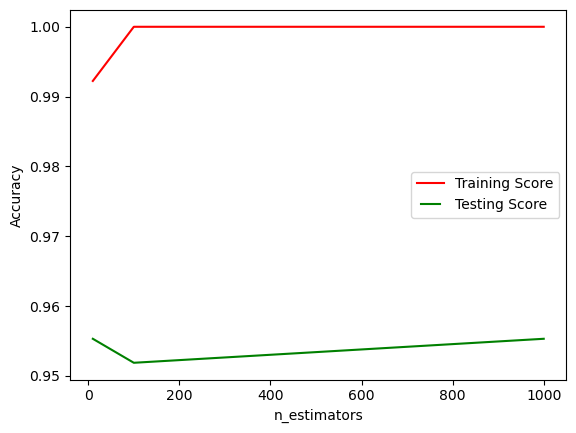

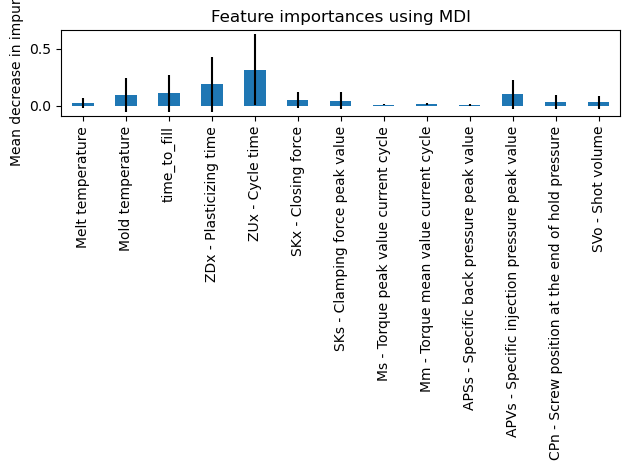

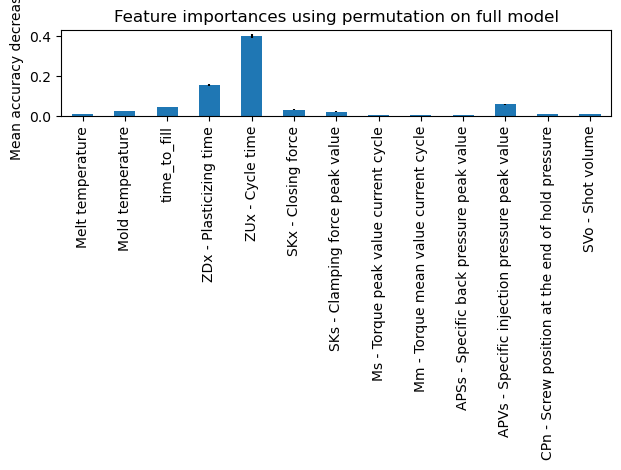

Classification report: 
              precision    recall  f1-score   support

         1.0       0.96      0.96      0.96        79
         2.0       0.96      0.95      0.96        83
         3.0       0.95      0.93      0.94        56
         4.0       0.95      0.97      0.96        73

    accuracy                           0.96       291
   macro avg       0.95      0.95      0.95       291
weighted avg       0.96      0.96      0.96       291

Accuracy score: 
0.9553264604810997
Confusion Matrix: 


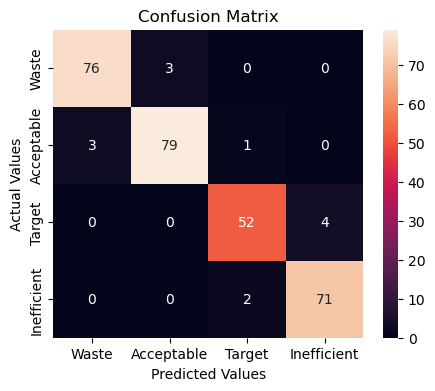

Normalized data
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best: 0.956924 using {'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 1000}


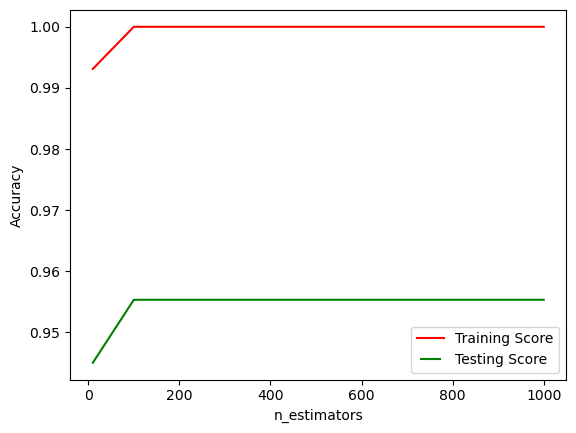

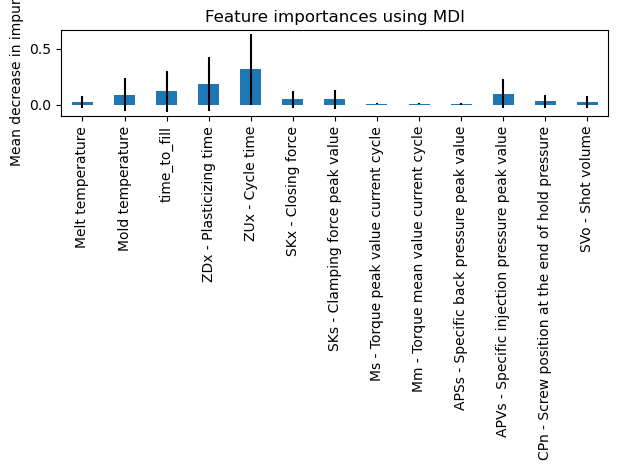

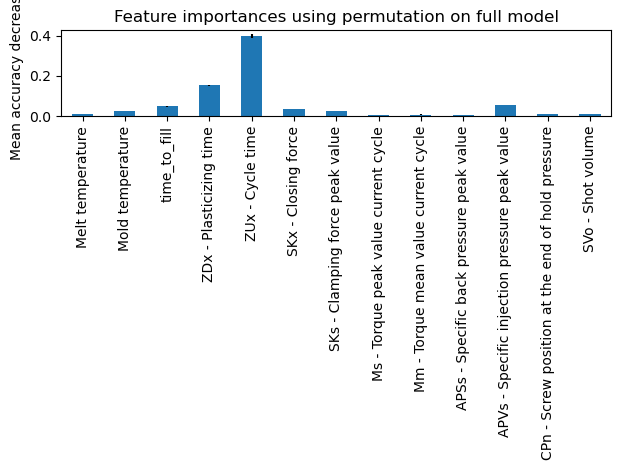

Classification report: 
              precision    recall  f1-score   support

         1.0       0.96      0.96      0.96        79
         2.0       0.96      0.95      0.96        83
         3.0       0.95      0.93      0.94        56
         4.0       0.95      0.97      0.96        73

    accuracy                           0.96       291
   macro avg       0.95      0.95      0.95       291
weighted avg       0.96      0.96      0.96       291

Accuracy score: 
0.9553264604810997
Confusion Matrix: 


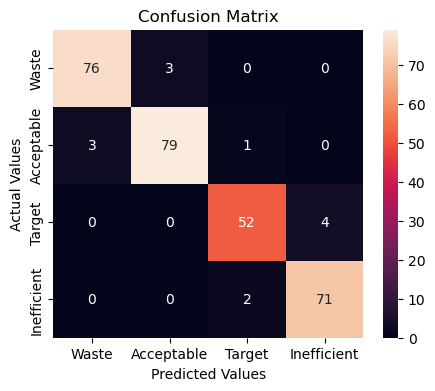

In [46]:
for key, X_data in datasets.items():
    print(key)
    y_pred = random_forest_regressor(X_data[0], y_train, X_data[1])
    a, _ = score_of_model(y_test, y_pred)

## XGBoost

In [47]:
def xgboost_regressor(X_train, y_train, X_test, y_test):
  xgb_model = xgb.XGBRegressor()
  param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
  }
  best_params, best_model = hyper_param_tuning(xgb_model, param_grid, X_train, y_train)
  # Make predictions with the best model
  y_pred = np.around(best_model.predict(X_test))
  score, _ = score_of_model(y_test, y_pred)
  return score
  

Raw data
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best: 0.951369 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Classification report: 
              precision    recall  f1-score   support

         1.0       0.97      0.96      0.97        79
         2.0       0.96      0.96      0.96        83
         3.0       0.95      0.93      0.94        56
         4.0       0.95      0.97      0.96        73

    accuracy                           0.96       291
   macro avg       0.96      0.96      0.96       291
weighted avg       0.96      0.96      0.96       291

Accuracy score: 
0.9587628865979382
Confusion Matrix: 


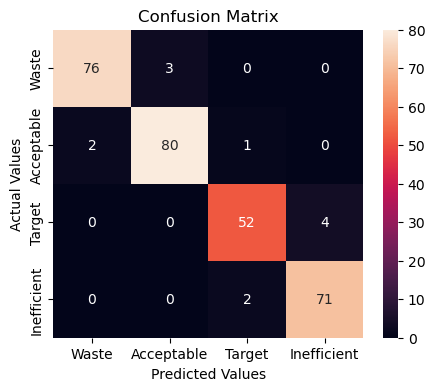

Standardized data
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best: 0.951663 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Classification report: 
              precision    recall  f1-score   support

         1.0       0.97      0.96      0.97        79
         2.0       0.96      0.96      0.96        83
         3.0       0.95      0.93      0.94        56
         4.0       0.95      0.97      0.96        73

    accuracy                           0.96       291
   macro avg       0.96      0.96      0.96       291
weighted avg       0.96      0.96      0.96       291

Accuracy score: 
0.9587628865979382
Confusion Matrix: 


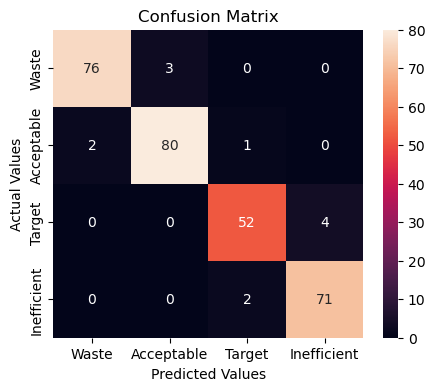

Normalized data
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best: 0.951878 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Classification report: 
              precision    recall  f1-score   support

         1.0       0.97      0.96      0.97        79
         2.0       0.96      0.96      0.96        83
         3.0       0.95      0.93      0.94        56
         4.0       0.95      0.97      0.96        73

    accuracy                           0.96       291
   macro avg       0.96      0.96      0.96       291
weighted avg       0.96      0.96      0.96       291

Accuracy score: 
0.9587628865979382
Confusion Matrix: 


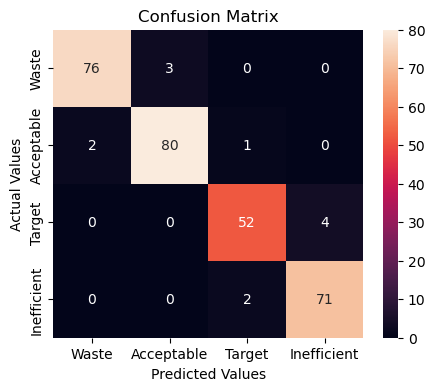

In [48]:
for key, X_data in datasets.items():
    print(key)
    xgboost_regressor(X_data[0], y_train, X_data[1], y_test)

## Gradient Boosting

In [49]:
def gradient_boosting_regressor(X_train, y_train, X_test, y_test):
  grad = GradientBoostingRegressor()
  param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
  }
  best_params, best_model = hyper_param_tuning(grad, param_grid, X_train, y_train)
  # Make predictions with the best model
  y_pred = np.around(best_model.predict(X_test))
  score, _ = score_of_model(y_test, y_pred)
  return score

Raw data
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best: 0.950994 using {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Classification report: 
              precision    recall  f1-score   support

         1.0       0.93      0.95      0.94        79
         2.0       0.95      0.92      0.93        83
         3.0       0.91      0.93      0.92        56
         4.0       0.95      0.95      0.95        73

    accuracy                           0.93       291
   macro avg       0.93      0.93      0.93       291
weighted avg       0.94      0.93      0.93       291

Accuracy score: 
0.9347079037800687
Confusion Matrix: 


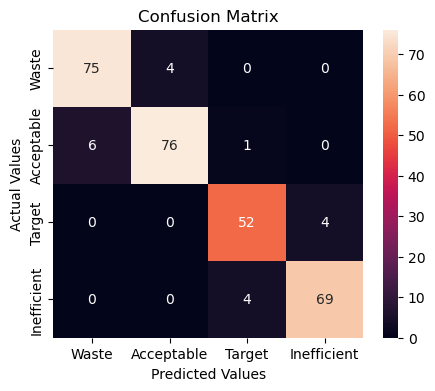

Standardized data
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best: 0.950989 using {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Classification report: 
              precision    recall  f1-score   support

         1.0       0.93      0.95      0.94        79
         2.0       0.95      0.92      0.93        83
         3.0       0.91      0.93      0.92        56
         4.0       0.95      0.95      0.95        73

    accuracy                           0.93       291
   macro avg       0.93      0.93      0.93       291
weighted avg       0.94      0.93      0.93       291

Accuracy score: 
0.9347079037800687
Confusion Matrix: 


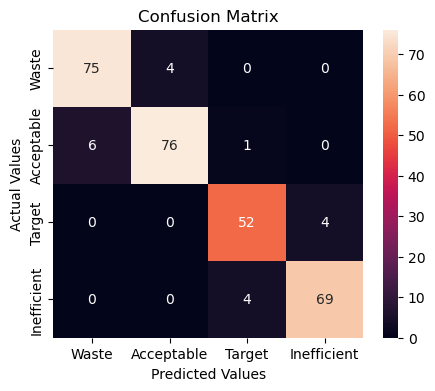

Normalized data
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best: 0.951191 using {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Classification report: 
              precision    recall  f1-score   support

         1.0       0.93      0.95      0.94        79
         2.0       0.95      0.92      0.93        83
         3.0       0.90      0.93      0.91        56
         4.0       0.94      0.93      0.94        73

    accuracy                           0.93       291
   macro avg       0.93      0.93      0.93       291
weighted avg       0.93      0.93      0.93       291

Accuracy score: 
0.9312714776632303
Confusion Matrix: 


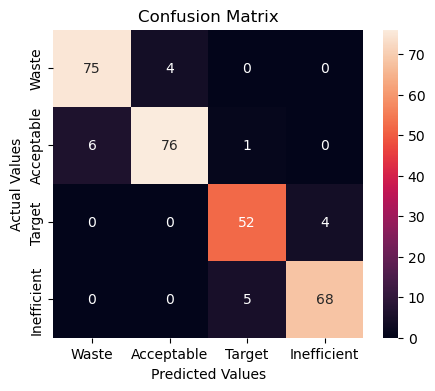

In [50]:
for key, X_data in datasets.items():
    print(key)
    gradient_boosting_regressor(X_data[0], y_train, X_data[1], y_test)

### SVM

In [51]:
def svm_reg(X_train, y_train, X_test, y_test):
    param_grid = {'C': [0.1, 1, 10],
                'epsilon': [0.1, 0.01, 0.001],
                'kernel': ['poly', 'rbf', 'sigmoid']
    }
    best_params, best_model = hyper_param_tuning(SVR(), param_grid, X_train, y_train)
    y_pred = pd.DataFrame(np.around(best_model.predict(X_test))).apply(lambda x: [1 if y <= 1 else y for y in x]).apply(lambda x: [4 if y >= 4 else y for y in x])
    sc,_ = score_of_model(y_test, y_pred)
    

Raw data
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best: 0.309059 using {'C': 10, 'epsilon': 0.001, 'kernel': 'poly'}
Classification report: 
              precision    recall  f1-score   support

         1.0       0.90      0.24      0.38        79
         2.0       0.50      0.95      0.66        83
         3.0       0.40      0.73      0.52        56
         4.0       0.11      0.01      0.02        73

    accuracy                           0.48       291
   macro avg       0.48      0.48      0.39       291
weighted avg       0.49      0.48      0.40       291

Accuracy score: 
0.48109965635738833
Confusion Matrix: 


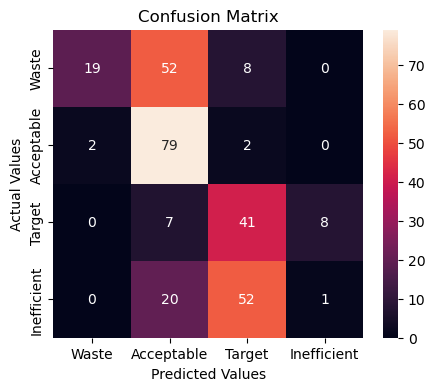

Standardized data
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best: 0.930771 using {'C': 10, 'epsilon': 0.001, 'kernel': 'rbf'}
Classification report: 
              precision    recall  f1-score   support

         1.0       0.91      0.81      0.86        79
         2.0       0.83      0.92      0.87        83
         3.0       0.91      0.91      0.91        56
         4.0       0.95      0.95      0.95        73

    accuracy                           0.89       291
   macro avg       0.90      0.90      0.90       291
weighted avg       0.90      0.89      0.89       291

Accuracy score: 
0.8934707903780069
Confusion Matrix: 


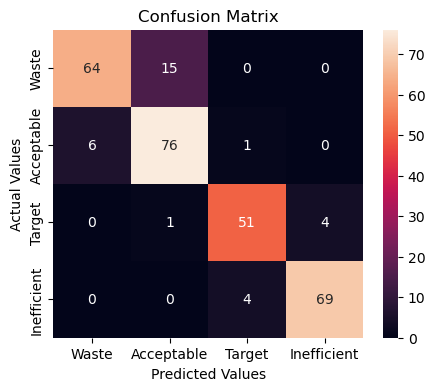

Normalized data
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best: 0.927270 using {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}
Classification report: 
              precision    recall  f1-score   support

         1.0       0.91      0.86      0.88        79
         2.0       0.87      0.90      0.89        83
         3.0       0.95      0.93      0.94        56
         4.0       0.95      0.97      0.96        73

    accuracy                           0.91       291
   macro avg       0.92      0.92      0.92       291
weighted avg       0.91      0.91      0.91       291

Accuracy score: 
0.9140893470790378
Confusion Matrix: 


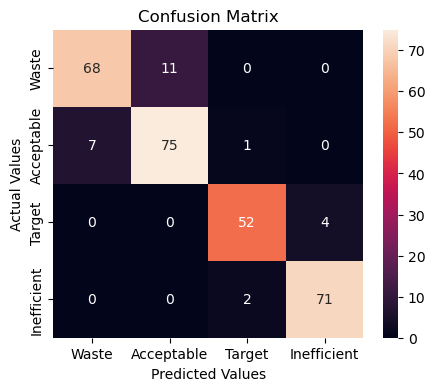

In [52]:
for key, X_data in datasets.items():
    print(key)
    svm_reg(X_data[0], y_train, X_data[1], y_test)

# Classification models

## Logister regression one-vs-all

In [53]:
def log_reg_one_vs_all(X_train, y_train, X_test, y_test):
    param_grid = {'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
                'C': [0.1, 1, 10],
                'penalty': ['l1', 'l2']
    }   
    best_params, best_model = hyper_param_tuning(LogisticRegression(max_iter=15000), param_grid, X_train, y_train)
    y_pred = best_model.predict(X_test)
    score, _ = score_of_model(y_test, y_pred)


Raw data
Fitting 5 folds for each of 18 candidates, totalling 90 fits


/opt/conda/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/conda/lib/python3.

Best: 0.855172 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Classification report: 
              precision    recall  f1-score   support

         1.0       0.83      0.75      0.79        79
         2.0       0.78      0.84      0.81        83
         3.0       0.95      0.93      0.94        56
         4.0       0.95      0.97      0.96        73

    accuracy                           0.87       291
   macro avg       0.88      0.87      0.87       291
weighted avg       0.87      0.87      0.87       291

Accuracy score: 
0.865979381443299
Confusion Matrix: 


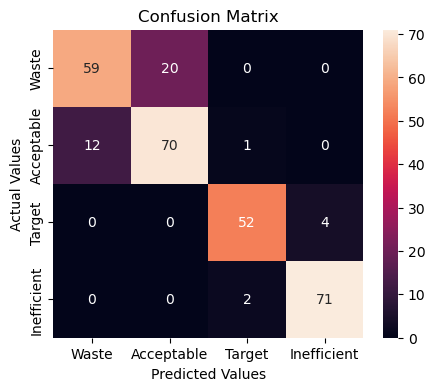

Standardized data
Fitting 5 folds for each of 18 candidates, totalling 90 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Best: 0.854310 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Classification report: 
              precision    recall  f1-score   support

         1.0       0.84      0.71      0.77        79
         2.0       0.76      0.86      0.80        83
         3.0       0.95      0.93      0.94        56
         4.0       0.95      0.97      0.96        73

    accuracy                           0.86       291
   macro avg       0.87      0.87      0.87       291
weighted avg       0.86      0.86      0.86       291

Accuracy score: 
0.8591065292096219
Confusion Matrix: 


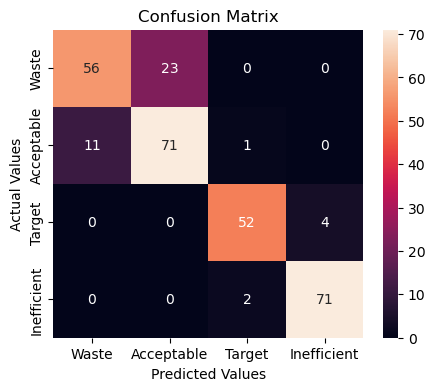

Normalized data
Fitting 5 folds for each of 18 candidates, totalling 90 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Best: 0.853448 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Classification report: 
              precision    recall  f1-score   support

         1.0       0.84      0.72      0.78        79
         2.0       0.76      0.86      0.81        83
         3.0       0.95      0.93      0.94        56
         4.0       0.95      0.97      0.96        73

    accuracy                           0.86       291
   macro avg       0.87      0.87      0.87       291
weighted avg       0.86      0.86      0.86       291

Accuracy score: 
0.8625429553264605
Confusion Matrix: 


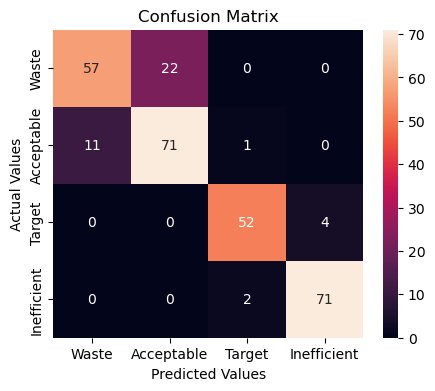

In [54]:
for key, X_data in datasets.items():
    print(key)
    log_reg_one_vs_all(X_data[0], y_train, X_data[1], y_test)

## Ridge Classifier

In [55]:
def ridge_classifier(X_train, y_train, X_test, y_test):
    param_grid = {
                'alpha': [0.1, 1, 10],
                'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
    }   
    best_params, best_model = hyper_param_tuning(RidgeClassifier(max_iter=10000), param_grid, X_train, y_train)
    y_pred = best_model.predict(X_test)
    score, _ = score_of_model(y_test, y_pred)

Raw data
Fitting 5 folds for each of 21 candidates, totalling 105 fits
Best: 0.848276 using {'alpha': 0.1, 'solver': 'lsqr'}
Classification report: 
              precision    recall  f1-score   support

         1.0       0.83      0.68      0.75        79
         2.0       0.76      0.86      0.80        83
         3.0       0.91      0.93      0.92        56
         4.0       0.95      0.97      0.96        73

    accuracy                           0.85       291
   macro avg       0.86      0.86      0.86       291
weighted avg       0.85      0.85      0.85       291

Accuracy score: 
0.852233676975945
Confusion Matrix: 


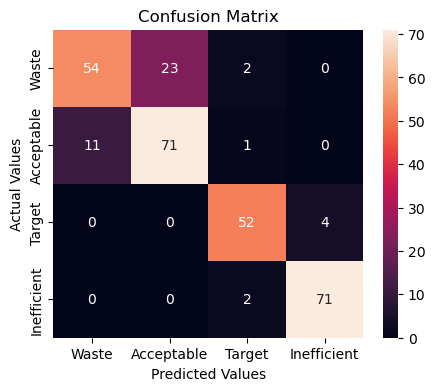

Standardized data
Fitting 5 folds for each of 21 candidates, totalling 105 fits
Best: 0.848276 using {'alpha': 10, 'solver': 'lsqr'}
Classification report: 
              precision    recall  f1-score   support

         1.0       0.84      0.66      0.74        79
         2.0       0.74      0.87      0.80        83
         3.0       0.91      0.93      0.92        56
         4.0       0.95      0.97      0.96        73

    accuracy                           0.85       291
   macro avg       0.86      0.86      0.85       291
weighted avg       0.85      0.85      0.85       291

Accuracy score: 
0.8487972508591065
Confusion Matrix: 


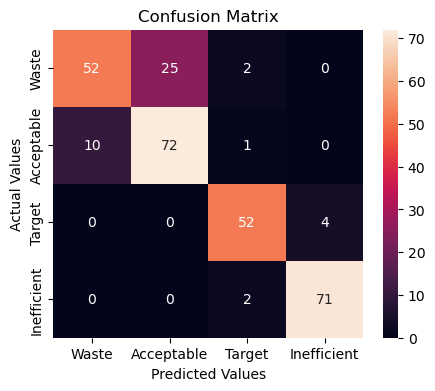

Normalized data
Fitting 5 folds for each of 21 candidates, totalling 105 fits
Best: 0.848276 using {'alpha': 1, 'solver': 'auto'}
Classification report: 
              precision    recall  f1-score   support

         1.0       0.84      0.68      0.76        79
         2.0       0.75      0.87      0.80        83
         3.0       0.91      0.93      0.92        56
         4.0       0.95      0.96      0.95        73

    accuracy                           0.85       291
   macro avg       0.86      0.86      0.86       291
weighted avg       0.86      0.85      0.85       291

Accuracy score: 
0.852233676975945
Confusion Matrix: 


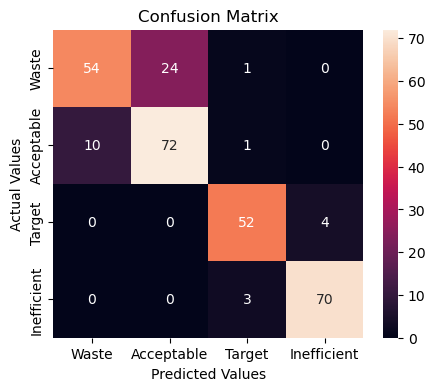

In [56]:
for key, X_data in datasets.items():
    print(key)
    ridge_classifier(X_data[0], y_train, X_data[1], y_test)

## KNN

In [57]:
def knn(X_train, y_train, X_test, y_test):
    param_grid = {
                'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                'weights': ['uniform', 'distance'],
                'metric': ['euclidean', 'manhattan', 'minkowski'],
                'p': [1, 2]
    }
    best_params, best_model = hyper_param_tuning(KNeighborsClassifier(), param_grid, X_train, y_train)
    y_pred = best_model.predict(X_test)
    score, _ = score_of_model(y_test, y_pred)

Raw data
Fitting 5 folds for each of 84 candidates, totalling 420 fits
Best: 0.913793 using {'metric': 'manhattan', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Classification report: 
              precision    recall  f1-score   support

         1.0       0.90      0.92      0.91        79
         2.0       0.93      0.90      0.91        83
         3.0       0.93      0.93      0.93        56
         4.0       0.96      0.96      0.96        73

    accuracy                           0.93       291
   macro avg       0.93      0.93      0.93       291
weighted avg       0.93      0.93      0.93       291

Accuracy score: 
0.9278350515463918
Confusion Matrix: 


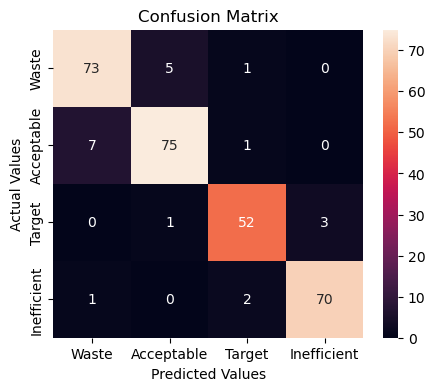

Standardized data
Fitting 5 folds for each of 84 candidates, totalling 420 fits
Best: 0.910345 using {'metric': 'manhattan', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Classification report: 
              precision    recall  f1-score   support

         1.0       0.90      0.84      0.87        79
         2.0       0.87      0.90      0.89        83
         3.0       0.91      0.93      0.92        56
         4.0       0.95      0.97      0.96        73

    accuracy                           0.91       291
   macro avg       0.91      0.91      0.91       291
weighted avg       0.91      0.91      0.91       291

Accuracy score: 
0.9072164948453608
Confusion Matrix: 


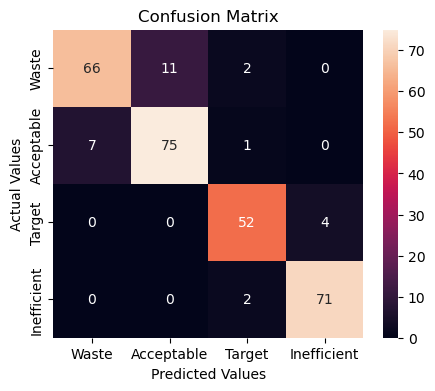

Normalized data
Fitting 5 folds for each of 84 candidates, totalling 420 fits
Best: 0.907759 using {'metric': 'manhattan', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Classification report: 
              precision    recall  f1-score   support

         1.0       0.91      0.85      0.88        79
         2.0       0.86      0.90      0.88        83
         3.0       0.95      0.93      0.94        56
         4.0       0.95      0.97      0.96        73

    accuracy                           0.91       291
   macro avg       0.91      0.91      0.91       291
weighted avg       0.91      0.91      0.91       291

Accuracy score: 
0.9106529209621993
Confusion Matrix: 


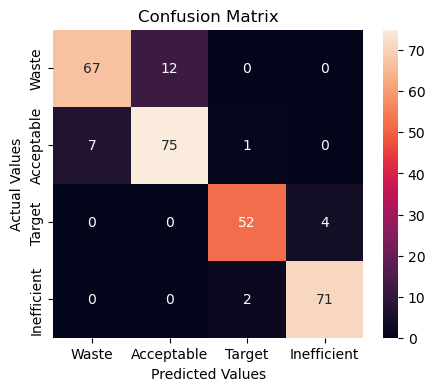

In [58]:
for key, X_data in datasets.items():
    print(key)
    knn(X_data[0], y_train, X_data[1], y_test)

## SVM

In [59]:
def svm(X_train, y_train, X_test, y_test):
    param_grid = {
                'C': [0.1, 1, 10],
                'gamma': [0.1, 1, 10],
                'kernel': ['linear', 'rbf', 'poly']
    }
    best_params, best_model = hyper_param_tuning(SVC(), param_grid, X_train, y_train)
    y_pred = best_model.predict(X_test) 
    sc,_ = score_of_model(y_test, y_pred)
    

Standardized data
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best: 0.920690 using {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Classification report: 
              precision    recall  f1-score   support

         1.0       0.92      0.86      0.89        79
         2.0       0.88      0.90      0.89        83
         3.0       0.91      0.93      0.92        56
         4.0       0.95      0.97      0.96        73

    accuracy                           0.91       291
   macro avg       0.92      0.92      0.92       291
weighted avg       0.91      0.91      0.91       291

Accuracy score: 
0.9140893470790378
Confusion Matrix: 


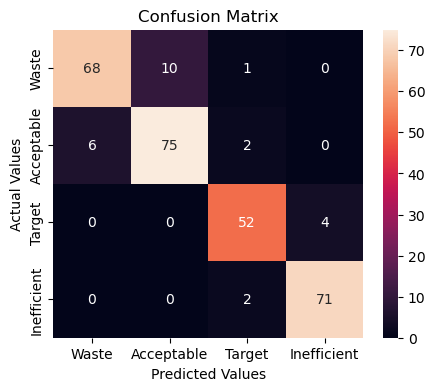

Normalized data
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best: 0.916379 using {'C': 10, 'gamma': 10, 'kernel': 'rbf'}
Classification report: 
              precision    recall  f1-score   support

         1.0       0.88      0.90      0.89        79
         2.0       0.90      0.89      0.90        83
         3.0       0.94      0.88      0.91        56
         4.0       0.93      0.97      0.95        73

    accuracy                           0.91       291
   macro avg       0.91      0.91      0.91       291
weighted avg       0.91      0.91      0.91       291

Accuracy score: 
0.9106529209621993
Confusion Matrix: 


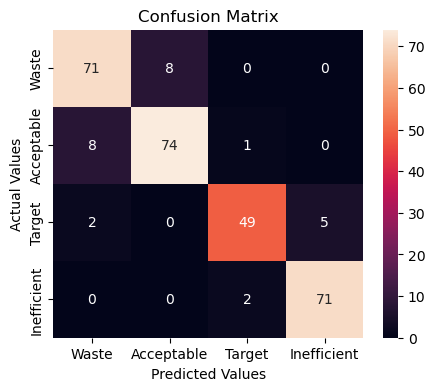

In [60]:
for key, X_data in datasets.items():
    if key != 'Raw data': # because for Raw Data it doesnt work
        print(key)
        svm(X_data[0], y_train, X_data[1], y_test)

## Decision Trees

In [61]:
def decision_tree_classifier(X_train, y_train, X_test, y_test):
    param_grid = {
                'criterion': ['gini', 'entropy'],
                'max_depth': [None, 5, 10, 20],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
    }
    best_params, best_model = hyper_param_tuning(DecisionTreeClassifier(), param_grid, X_train, y_train)
    y_pred = best_model.predict(X_test)
    sc,_ = score_of_model(y_test, y_pred)
    return sc


Raw data
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best: 0.910345 using {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Classification report: 
              precision    recall  f1-score   support

         1.0       0.92      0.92      0.92        79
         2.0       0.93      0.92      0.92        83
         3.0       0.93      0.93      0.93        56
         4.0       0.95      0.96      0.95        73

    accuracy                           0.93       291
   macro avg       0.93      0.93      0.93       291
weighted avg       0.93      0.93      0.93       291

Accuracy score: 
0.9312714776632303
Confusion Matrix: 


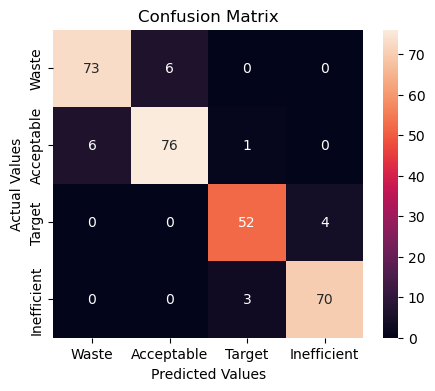

Standardized data
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best: 0.911207 using {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}
Classification report: 
              precision    recall  f1-score   support

         1.0       0.93      0.94      0.93        79
         2.0       0.94      0.92      0.93        83
         3.0       0.91      0.93      0.92        56
         4.0       0.95      0.95      0.95        73

    accuracy                           0.93       291
   macro avg       0.93      0.93      0.93       291
weighted avg       0.93      0.93      0.93       291

Accuracy score: 
0.9312714776632303
Confusion Matrix: 


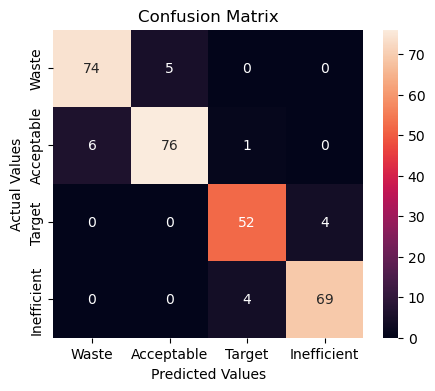

Normalized data
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best: 0.910345 using {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Classification report: 
              precision    recall  f1-score   support

         1.0       0.94      0.91      0.92        79
         2.0       0.90      0.93      0.91        83
         3.0       0.88      0.89      0.88        56
         4.0       0.94      0.92      0.93        73

    accuracy                           0.91       291
   macro avg       0.91      0.91      0.91       291
weighted avg       0.91      0.91      0.91       291

Accuracy score: 
0.9140893470790378
Confusion Matrix: 


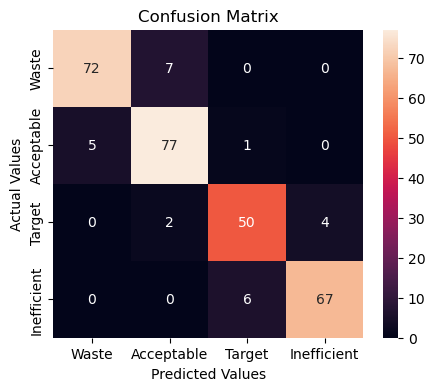

In [62]:
for key, X_data in datasets.items():
    print(key)
    decision_tree_classifier(X_data[0], y_train, X_data[1], y_test)

## Random Forest

In [63]:
def random_forest_classifier(X_train, y_train, X_test, y_test):
    n_estimators = [10, 100, 1000]
    max_features = ['sqrt', 'log2']
    max_depth = [10, 50, 110]
    grid = dict(n_estimators=n_estimators, max_features=max_features, max_depth = max_depth)

    best_params, best_model = hyper_param_tuning(RandomForestClassifier(), grid, X_train, y_train)

    y_pred = best_model.predict(X_test)
    sc,_ = score_of_model(y_test, y_pred)

    # Plot results for different number of n_estimators
    train_results = []
    test_results = []
    for nb_trees in n_estimators:
        rf = RandomForestClassifier(n_estimators=nb_trees, 
                                    max_features=best_params['max_features'],
                                    max_depth= best_params['max_depth']).fit(X_train, y_train)
        pr_tr = np.around(rf.predict(X_train))
        pr_te = np.around(rf.predict(X_test))
        train_results.append(accuracy_score(y_train, pr_tr))
        test_results.append(accuracy_score(y_test, pr_te))
    scores_plot(n_estimators, train_results, test_results)
    feature_importance_impurity(best_model, X_train, y_train)
    feature_importance_permutations(best_model, X_train, y_train)
    return y_pred

Raw data
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best: 0.946552 using {'max_depth': 50, 'max_features': 'log2', 'n_estimators': 100}
Classification report: 
              precision    recall  f1-score   support

         1.0       0.95      0.95      0.95        79
         2.0       0.95      0.94      0.95        83
         3.0       0.95      0.93      0.94        56
         4.0       0.95      0.97      0.96        73

    accuracy                           0.95       291
   macro avg       0.95      0.95      0.95       291
weighted avg       0.95      0.95      0.95       291

Accuracy score: 
0.9484536082474226
Confusion Matrix: 


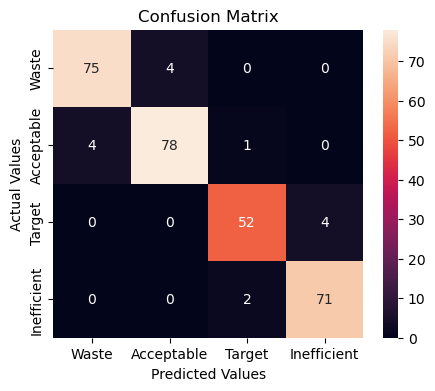

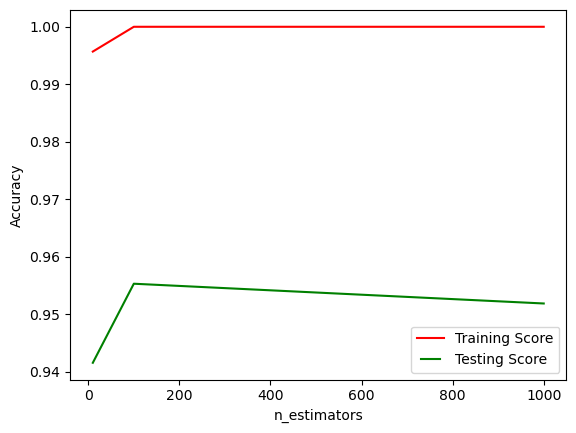

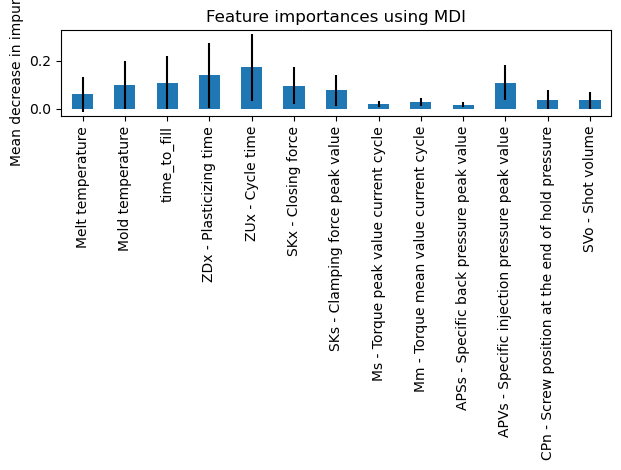

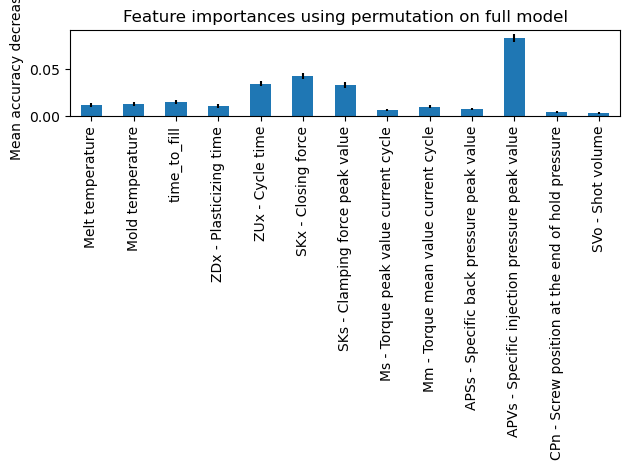

Standardized data
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best: 0.947414 using {'max_depth': 110, 'max_features': 'log2', 'n_estimators': 100}
Classification report: 
              precision    recall  f1-score   support

         1.0       0.96      0.96      0.96        79
         2.0       0.96      0.95      0.96        83
         3.0       0.95      0.93      0.94        56
         4.0       0.95      0.97      0.96        73

    accuracy                           0.96       291
   macro avg       0.95      0.95      0.95       291
weighted avg       0.96      0.96      0.96       291

Accuracy score: 
0.9553264604810997
Confusion Matrix: 


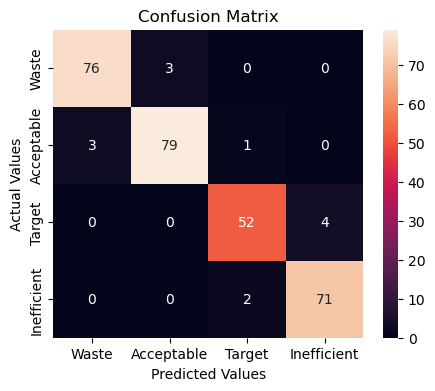

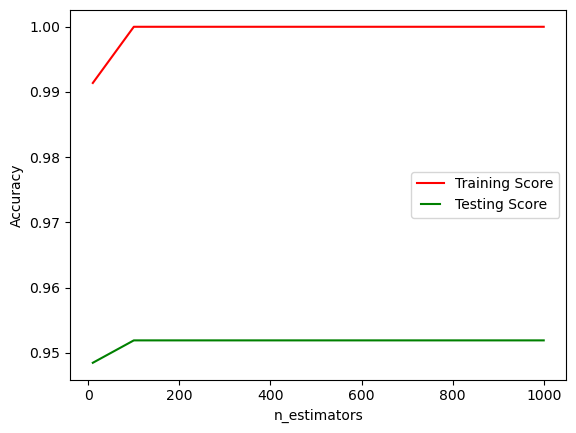

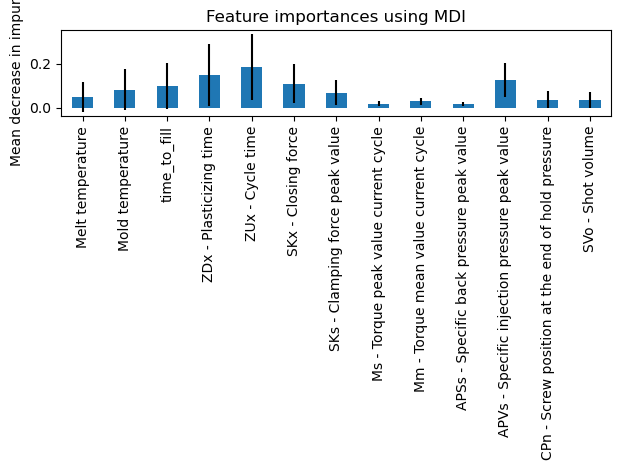

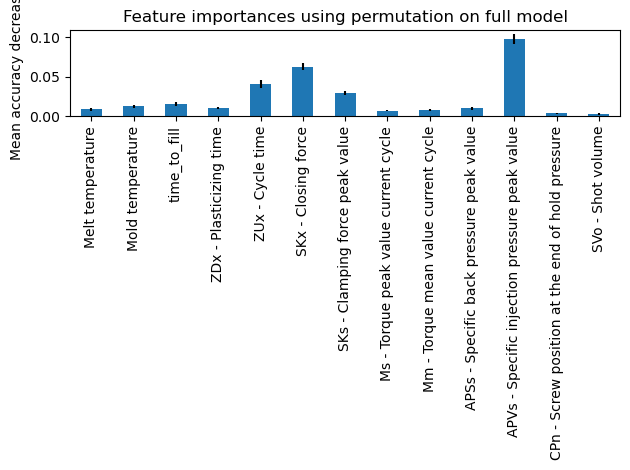

Normalized data
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best: 0.945690 using {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 1000}
Classification report: 
              precision    recall  f1-score   support

         1.0       0.96      0.95      0.96        79
         2.0       0.95      0.95      0.95        83
         3.0       0.95      0.93      0.94        56
         4.0       0.95      0.97      0.96        73

    accuracy                           0.95       291
   macro avg       0.95      0.95      0.95       291
weighted avg       0.95      0.95      0.95       291

Accuracy score: 
0.9518900343642611
Confusion Matrix: 


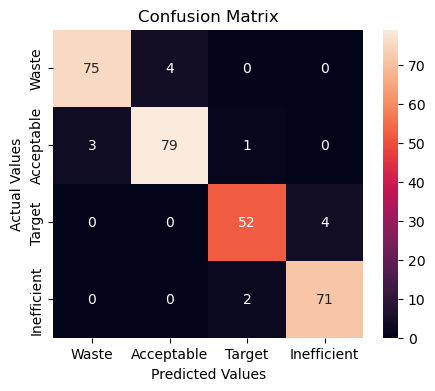

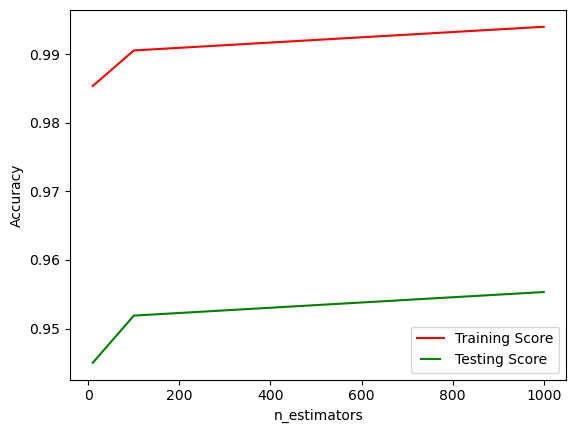

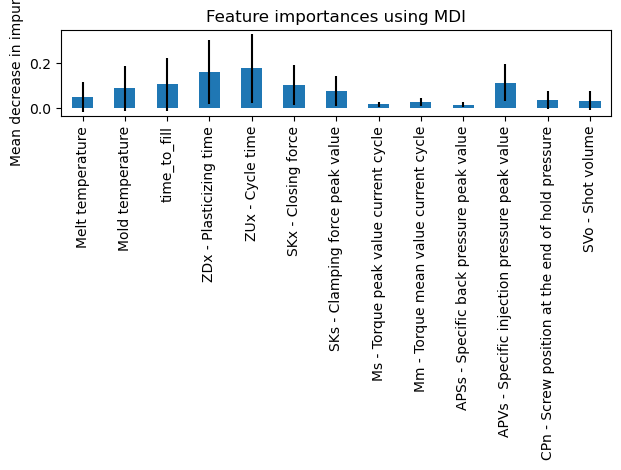

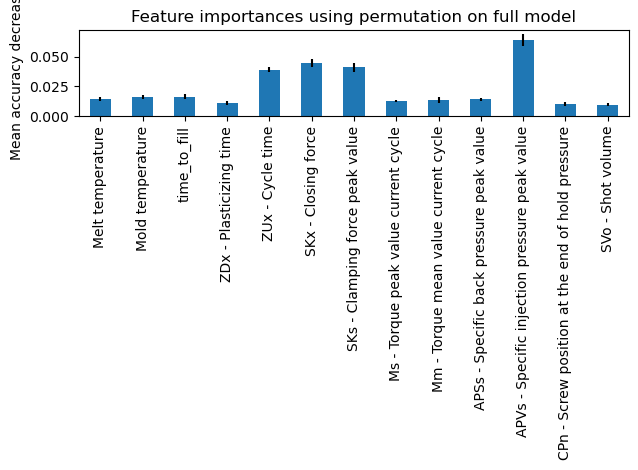

In [64]:
for key, X_data in datasets.items():
    print(key)
    random_forest_classifier(X_data[0], y_train, X_data[1], y_test)

## XgBoost


In [65]:
def xgboost_classifier(X_train, y_train, X_test, y_test):
  xgb_model = xgb.XGBClassifier()
  param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
  }
  best_params, best_model = hyper_param_tuning(xgb_model, param_grid, X_train, y_train)
  # Make predictions with the best model
  y_pred = best_model.predict(X_test)
  score, _ = score_of_model(y_test, y_pred)
  return score
  

Raw data
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best: 0.941379 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Classification report: 
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96        79
         1.0       0.94      0.96      0.95        83
         2.0       0.95      0.93      0.94        56
         3.0       0.95      0.96      0.95        73

    accuracy                           0.95       291
   macro avg       0.95      0.95      0.95       291
weighted avg       0.95      0.95      0.95       291

Accuracy score: 
0.9518900343642611
Confusion Matrix: 


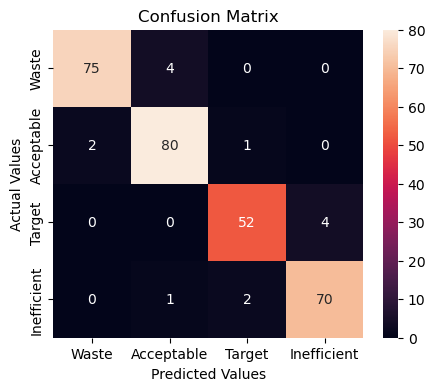

Standardized data
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best: 0.941379 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Classification report: 
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96        79
         1.0       0.94      0.96      0.95        83
         2.0       0.95      0.93      0.94        56
         3.0       0.95      0.96      0.95        73

    accuracy                           0.95       291
   macro avg       0.95      0.95      0.95       291
weighted avg       0.95      0.95      0.95       291

Accuracy score: 
0.9518900343642611
Confusion Matrix: 


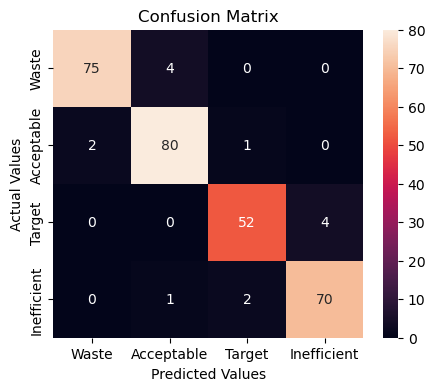

Normalized data
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best: 0.941379 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Classification report: 
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96        79
         1.0       0.94      0.96      0.95        83
         2.0       0.95      0.93      0.94        56
         3.0       0.95      0.96      0.95        73

    accuracy                           0.95       291
   macro avg       0.95      0.95      0.95       291
weighted avg       0.95      0.95      0.95       291

Accuracy score: 
0.9518900343642611
Confusion Matrix: 


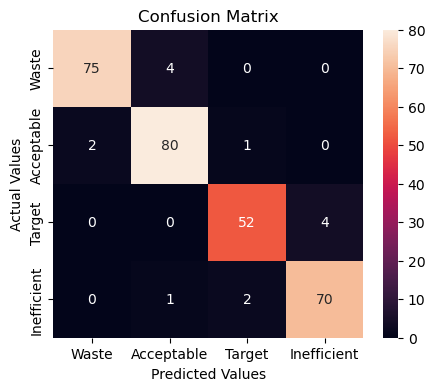

In [66]:
for key, X_data in datasets.items():
    print(key)
    y_train_c = y_train.copy() - 1
    y_test_c = y_test.copy() - 1
    xgboost_classifier(X_data[0], y_train_c, X_data[1], y_test_c)

## Gradient Boosting

In [67]:
def gradient_boosting_classifier(X_train, y_train, X_test, y_test):
  grad = GradientBoostingClassifier()
  param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.5, 0.7, 1.0]
  }
  best_params, best_model = hyper_param_tuning(grad, param_grid, X_train, y_train)
  # Make predictions with the best model
  y_pred = best_model.predict(X_test)
  score, _ = score_of_model(y_test, y_pred)
  return score

Raw data
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best: 0.946552 using {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.5}
Classification report: 
              precision    recall  f1-score   support

         1.0       0.95      0.97      0.96        79
         2.0       0.97      0.94      0.96        83
         3.0       0.91      0.93      0.92        56
         4.0       0.95      0.95      0.95        73

    accuracy                           0.95       291
   macro avg       0.95      0.95      0.95       291
weighted avg       0.95      0.95      0.95       291

Accuracy score: 
0.9484536082474226
Confusion Matrix: 


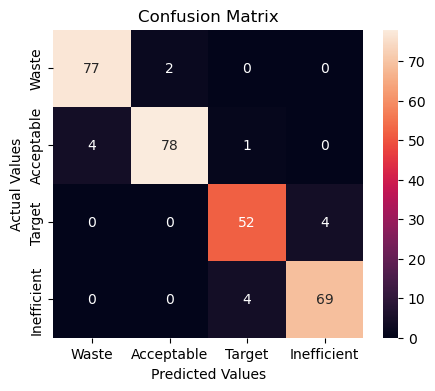

Standardized data
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best: 0.945690 using {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.5}
Classification report: 
              precision    recall  f1-score   support

         1.0       0.93      0.97      0.95        79
         2.0       0.97      0.92      0.94        83
         3.0       0.91      0.93      0.92        56
         4.0       0.95      0.95      0.95        73

    accuracy                           0.94       291
   macro avg       0.94      0.94      0.94       291
weighted avg       0.94      0.94      0.94       291

Accuracy score: 
0.9415807560137457
Confusion Matrix: 


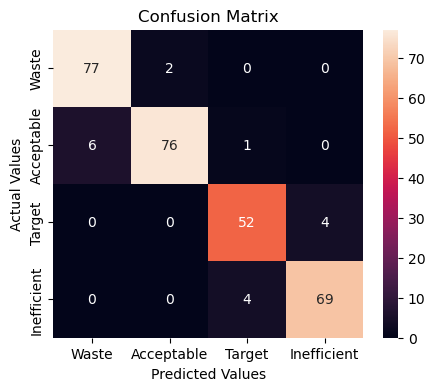

Normalized data
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best: 0.943966 using {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.5}
Classification report: 
              precision    recall  f1-score   support

         1.0       0.94      0.97      0.96        79
         2.0       0.97      0.93      0.95        83
         3.0       0.95      0.93      0.94        56
         4.0       0.95      0.97      0.96        73

    accuracy                           0.95       291
   macro avg       0.95      0.95      0.95       291
weighted avg       0.95      0.95      0.95       291

Accuracy score: 
0.9518900343642611
Confusion Matrix: 


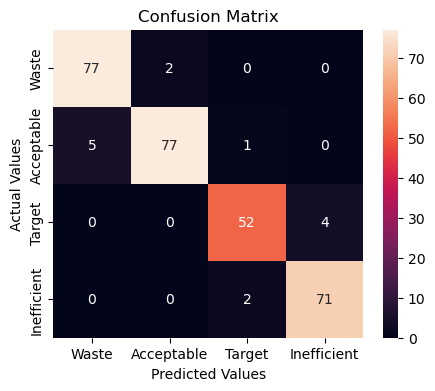

In [68]:
for key, X_data in datasets.items():
    print(key)
    gradient_boosting_classifier(X_data[0], y_train, X_data[1], y_test)